<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://staffhome.np.edu.sg/campus/corpcomm/Downloadable/Logo%20%20Icon/ICT/ICT%20Logo%20Full%20Colour.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Table of Contents<a id="part1"></a>

#### 1. [Import Required Packages](#part1) 
#### 2. [Load Data into Jupyter Notebook](#part2)
#### 3. [Exploratory Data Analysis](#part3)
#### 4. [Data Preprocessing](#part4)
- [2.1 Transformation](#part2.1)
  - [2.11 Logarithmic](#part2.11)
#### 5. [Train and Test Split](#part5)
#### 6. [Missing Value Imputation](#part6)
#### 7. [Categorical Data Encoding](#part7)
- [7.1 One-Hot Encoding](#part7.1)
- [7.2 Target Mean Encoding](#part7.2)
- [7.3 Ordered Ordinal Encoding](#part7.3)
#### 8. [Variable Discretization/Binning](#part8)
#### 9. [Feature Engineer](#part9)
#### 10. [Linear Regression Model](#part10)
#### 11. [Report](#part11)
#### 12. [References](#part12)

### Importing of packages<a id="part1"></a>


In [1]:
# import the pacakges
import numpy as np
import pandas as pd
import feature_engine

# to split the datasets
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from sklearn.linear_model import LinearRegression
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.transformation import LogTransformer


# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.imputation import MeanMedianImputer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import ReciprocalTransformer
import feature_engine.imputation as mdi
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from feature_engine.discretisation import EqualWidthDiscretiser

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from feature_engine.transformation import YeoJohnsonTransformer
# the scaler - for standardization
from sklearn.preprocessing import StandardScaler


### Step 1: Load Data into Jupyter Notebook<a id="part2"></a>

In [2]:
# load the dataset and show the info of dataset
data_song_pop = pd.read_csv('song_popularity.csv')
data_song_pop_tts = data_song_pop
data_song_pop.head()

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,HI8,Boulevard of Broken Dreams,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,HI10,In The End,216933,0.010094,0.53658,85.3,0.000000,3,122.7664,0,NaN,105.256,0.370,high,-6.407,Roar,45.37,127.95
2,MI11,Seven Nation Army,231733,0.008007,0.72963,46.3,0.447000,0,157.5025,1,118.80,123.881,0.324,Med,-7.828,Roar,47.28,69.45
3,EI8,By The Way,216933,0.025872,0.44649,97.0,0.003550,0,121.4404,1,160.50,122.444,0.198,Extra,-4.938,Blare,52.89,145.50
4,HI9,How You Remind Me,223826,0.000935,0.44253,76.6,0.000000,10,123.8769,1,46.95,172.011,0.574,Hi,-5.065,Blare,46.68,114.90


### Step 2: Exploratory Data Analysis<a id="part3"></a>

In [3]:
data_song_pop.isnull().mean()

Code                0.000000
Song_Name           0.000000
Song_Duration_ms    0.000000
Acousticness        0.000000
Danceability        0.153809
Energy              0.000000
Instrumentalness    0.000000
Key                 0.000000
Liveness            0.000000
Audio_mode          0.000000
Speechiness         0.300027
Tempo               0.000000
Audio_valence       0.000000
Dynamism            0.196337
Decibel             0.000000
Loudness            0.000000
Song_Popularity     0.000000
Indicator           0.000000
dtype: float64

In [4]:
data_song_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18835 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          18835 non-null  object 
 16  Song_Popularity   18835 non-null  float6

In [5]:
data_song_pop = data_song_pop.dropna()

In [6]:
data_song_pop.isnull().mean()

Code                0.0
Song_Name           0.0
Song_Duration_ms    0.0
Acousticness        0.0
Danceability        0.0
Energy              0.0
Instrumentalness    0.0
Key                 0.0
Liveness            0.0
Audio_mode          0.0
Speechiness         0.0
Tempo               0.0
Audio_valence       0.0
Dynamism            0.0
Decibel             0.0
Loudness            0.0
Song_Popularity     0.0
Indicator           0.0
dtype: float64

In [7]:
data_song_pop.replace('?', np.nan, inplace=True)


C:\Users\sahan\AppData\Local\Temp\ipykernel_102992\791955045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_song_pop.replace('?', np.nan, inplace=True)


In [8]:
data_song_pop = data_song_pop.dropna()


In [9]:
data_song_pop['Loudness'].unique()

array(['Blare', 'Roar', 'Boom', 'Clang', 'Rumble', 'Babble', 'Buzz',
       'Chatter', 'Rustle', 'Hum', 'Blast', 'Ear-splitting', 'Mutter',
       'Drone', 'Whisper', 'Mumble', 'Murmur', 'Deafening'], dtype=object)

In [10]:
data_song_pop.nunique()

Code                 149
Song_Name           6546
Song_Duration_ms    6231
Acousticness        2503
Danceability         778
Energy               999
Instrumentalness    2710
Key                   12
Liveness            1202
Audio_mode             2
Speechiness         1130
Tempo               6292
Audio_valence       1077
Dynamism              11
Decibel             5165
Loudness              18
Song_Popularity     3849
Indicator            999
dtype: int64

In [11]:
# find numerical variables
num_cols = [c for c in data_song_pop.columns if data_song_pop[c].dtypes !='O']
data_song_pop[num_cols].isnull().mean().sort_values()

Song_Duration_ms    0.0
Acousticness        0.0
Danceability        0.0
Energy              0.0
Instrumentalness    0.0
Key                 0.0
Audio_mode          0.0
Speechiness         0.0
Tempo               0.0
Audio_valence       0.0
Decibel             0.0
Song_Popularity     0.0
Indicator           0.0
dtype: float64

In [12]:
data_song_pop[num_cols].describe()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Audio_mode,Speechiness,Tempo,Audio_valence,Decibel,Song_Popularity,Indicator
count,8.063000e+03,8063.000000,8063.000000,8063.000000,8063.000000,8063.000000,8063.00000,8063.000000,8063.00000,8063.000000,8063.000000,8063.000000,8063.000000
mean,2.187128e+05,0.255430,0.624070,64.384593,0.081272,5.301749,0.61962,152.426733,121.09628,0.524927,-7.492043,42.340595,96.576892
std,6.259964e+04,0.284593,0.155146,21.561463,0.226037,3.615597,0.48551,153.723118,28.94115,0.244738,3.889277,13.991356,32.342186
min,3.592000e+04,0.000001,0.000000,0.107000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,-38.768000,0.850000,0.160000
25%,1.840160e+05,0.024304,0.524700,50.500000,0.000000,2.000000,0.00000,56.550000,98.05600,0.334000,-9.127000,32.770000,75.750000
50%,2.110660e+05,0.129360,0.634590,67.500000,0.000013,5.000000,1.00000,83.700000,120.03200,0.522000,-6.574000,42.820000,101.250000
75%,2.432760e+05,0.421400,0.738540,81.400000,0.003090,8.000000,1.00000,178.500000,139.94300,0.720000,-4.918000,52.250000,122.100000
max,1.799346e+06,0.976080,0.968220,99.700000,0.982000,11.000000,1.00000,1372.500000,214.68600,0.981000,1.585000,99.320000,149.550000


In [13]:
data_song_pop[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8063 entries, 0 to 18834
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song_Duration_ms  8063 non-null   int64  
 1   Acousticness      8063 non-null   float64
 2   Danceability      8063 non-null   float64
 3   Energy            8063 non-null   float64
 4   Instrumentalness  8063 non-null   float64
 5   Key               8063 non-null   int64  
 6   Audio_mode        8063 non-null   int64  
 7   Speechiness       8063 non-null   float64
 8   Tempo             8063 non-null   float64
 9   Audio_valence     8063 non-null   float64
 10  Decibel           8063 non-null   float64
 11  Song_Popularity   8063 non-null   float64
 12  Indicator         8063 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 881.9 KB


In [14]:
data_song_pop[num_cols].columns

Index(['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Key', 'Audio_mode', 'Speechiness', 'Tempo',
       'Audio_valence', 'Decibel', 'Song_Popularity', 'Indicator'],
      dtype='object')

array([[<Axes: title={'center': 'Song_Duration_ms'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>],
       [<Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Audio_mode'}>,
        <Axes: title={'center': 'Speechiness'}>],
       [<Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Audio_valence'}>,
        <Axes: title={'center': 'Decibel'}>,
        <Axes: title={'center': 'Song_Popularity'}>],
       [<Axes: title={'center': 'Indicator'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

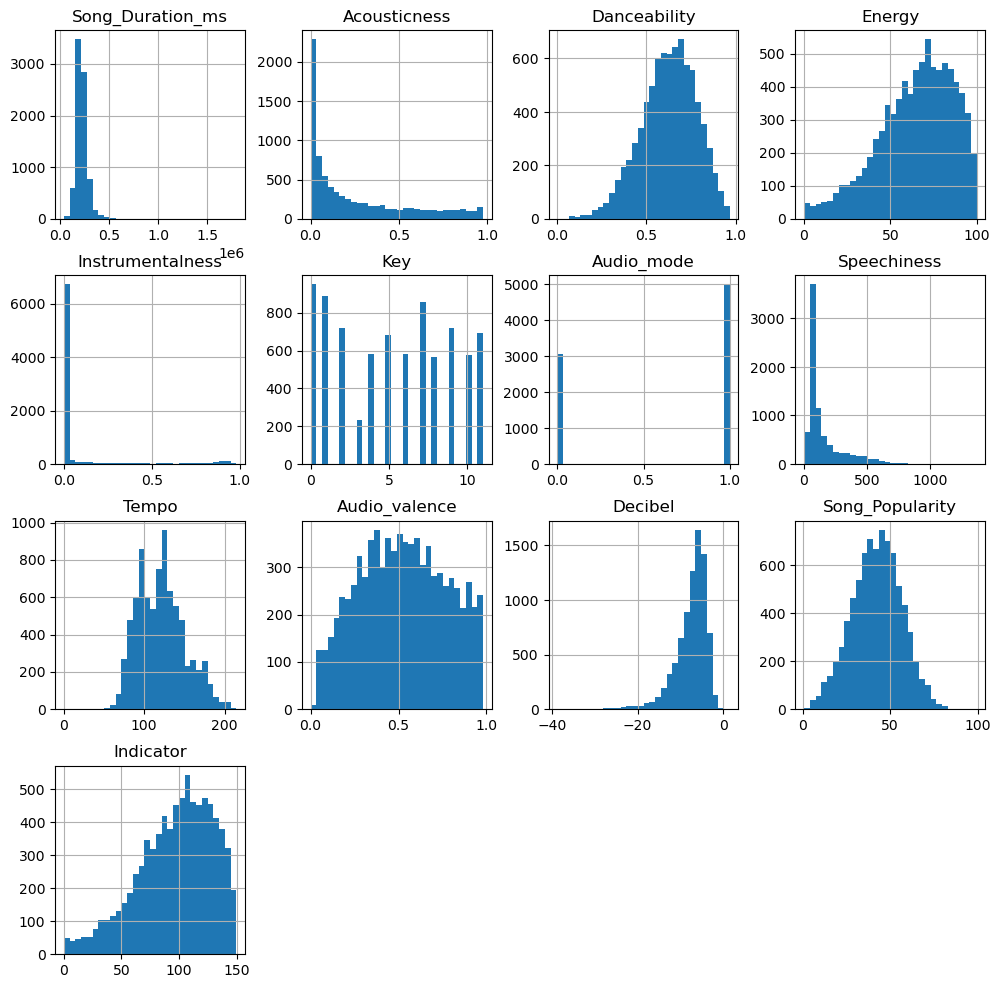

In [15]:
data_song_pop[num_cols].hist(bins=30, figsize=(12,12))


In [16]:
data_song_pop[num_cols].corr()


,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Audio_mode,Speechiness,Tempo,Audio_valence,Decibel,Song_Popularity,Indicator
Song_Duration_ms,1.000000,-0.086431,-0.107115,0.081208,-0.028069,-0.006409,-0.031639,-0.065744,0.012838,-0.059587,0.011297,0.009654,0.081208
Acousticness,-0.086431,1.000000,-0.188857,-0.664378,0.186631,0.003193,0.071781,-0.098134,-0.124126,-0.113465,-0.568637,-0.288765,-0.664378
Danceability,-0.107115,-0.188857,1.000000,0.047284,-0.135845,0.003782,-0.123733,0.213643,-0.112880,0.337983,0.184079,0.207397,0.047283
Energy,0.081208,-0.664378,0.047284,1.000000,-0.219197,0.017388,-0.063038,0.062348,0.169860,0.310452,0.764662,0.407409,1.000000
Instrumentalness,-0.028069,0.186631,-0.135845,-0.219197,1.000000,-0.017524,-0.011032,-0.091854,-0.043289,-0.182495,-0.399833,-0.251980,-0.219196
Key,-0.006409,0.003193,0.003782,0.017388,-0.017524,1.000000,-0.165314,0.032245,0.015109,0.028839,0.012126,-0.007821,0.017388
Audio_mode,-0.031639,0.071781,-0.123733,-0.063038,-0.011032,-0.165314,1.000000,-0.122302,0.017652,-0.005815,-0.072890,-0.036045,-0.063038
Speechiness,-0.065744,-0.098134,0.213643,0.062348,-0.091854,0.032245,-0.122302,1.000000,0.074906,0.004934,0.093163,0.036393,0.062348
Tempo,0.012838,-0.124126,-0.112880,0.169860,-0.043289,0.015109,0.017652,0.074906,1.000000,0.040477,0.136801,0.055320,0.169860
Audio_valence,-0.059587,-0.113465,0.337983,0.310452,-0.182495,0.028839,-0.005815,0.004934,0.040477,1.000000,0.203997,0.313968,0.310452


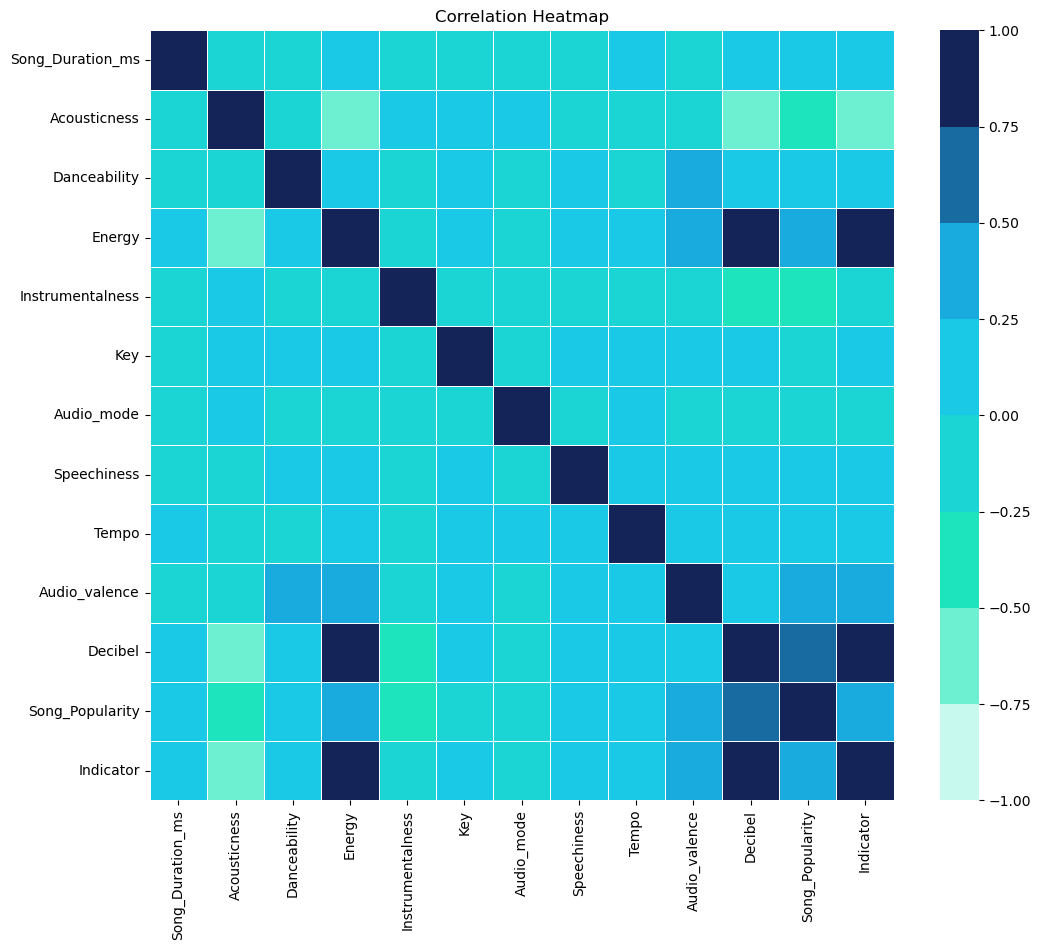

In [17]:

# Define your custom color scheme from lightest to darkest
custom_colors = ['#C7F9EE', '#6DF0D2', '#1DE4BD', '#1BD4D4', '#1AC9E6', '#19AADE', '#176BA0', '#142459']
cmap_custom = ListedColormap(custom_colors)

# Convert numeric columns to the correct data type if necessary
data_song_pop[num_cols] = data_song_pop[num_cols].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr_matrix = data_song_pop[num_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap=cmap_custom, annot=False, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

plt.title("Correlation Heatmap")
plt.show()


strong positive corr:
- Indicator and Energy
- Decibel and Energy
- Decibel and Indicator
- Decibel and Song Popularity

Strong negative corr:
- Acousticness and Indicator
- Decibel and Acousticness
- Energy and Acousticness

C:\Users\sahan\AppData\Local\Temp\ipykernel_102992\562778992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Song_Popularity', y='Song_Name', data=top_songs, palette=custom_colors)
C:\Users\sahan\AppData\Local\Temp\ipykernel_102992\562778992.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(x='Song_Popularity', y='Song_Name', data=top_songs, palette=custom_colors)


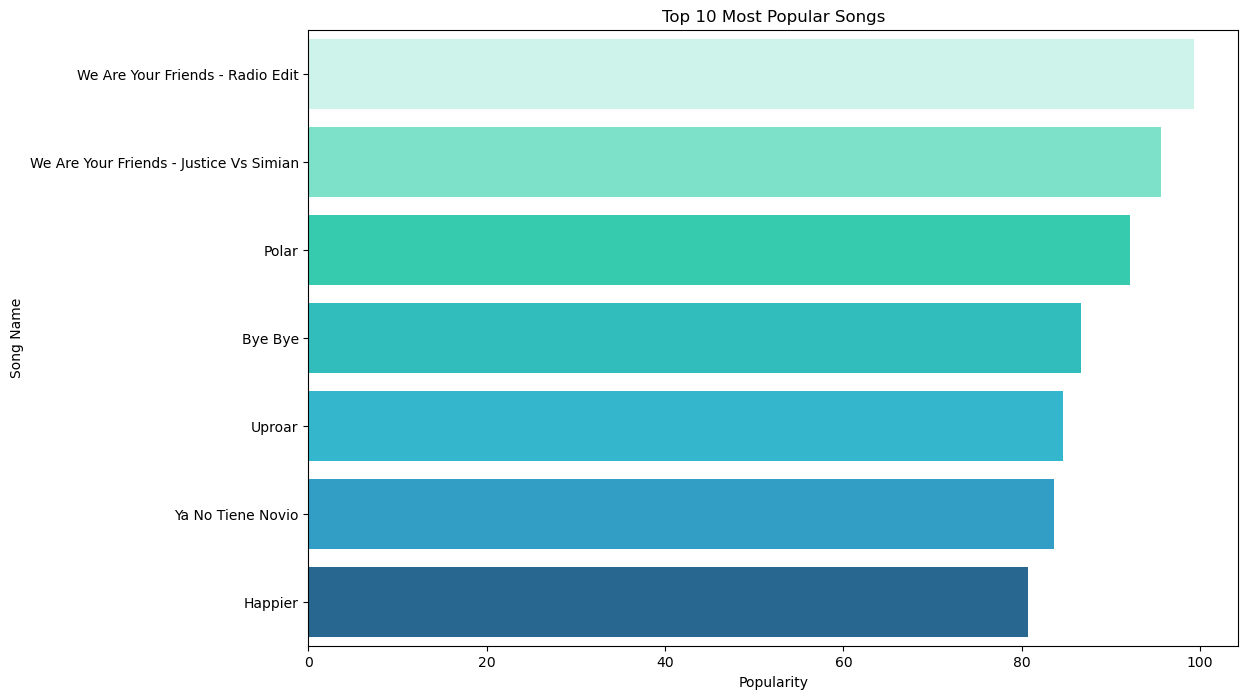

In [18]:
# Sort the DataFrame by 'Song_Popularity' in descending order
sorted_data = data_song_pop.sort_values(by='Song_Popularity', ascending=False)

# Select the top N most popular songs (e.g., top 10)
top_n = 10
top_songs = sorted_data.head(top_n)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Song_Popularity', y='Song_Name', data=top_songs, palette=custom_colors)
plt.title('Top 10 Most Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.show()

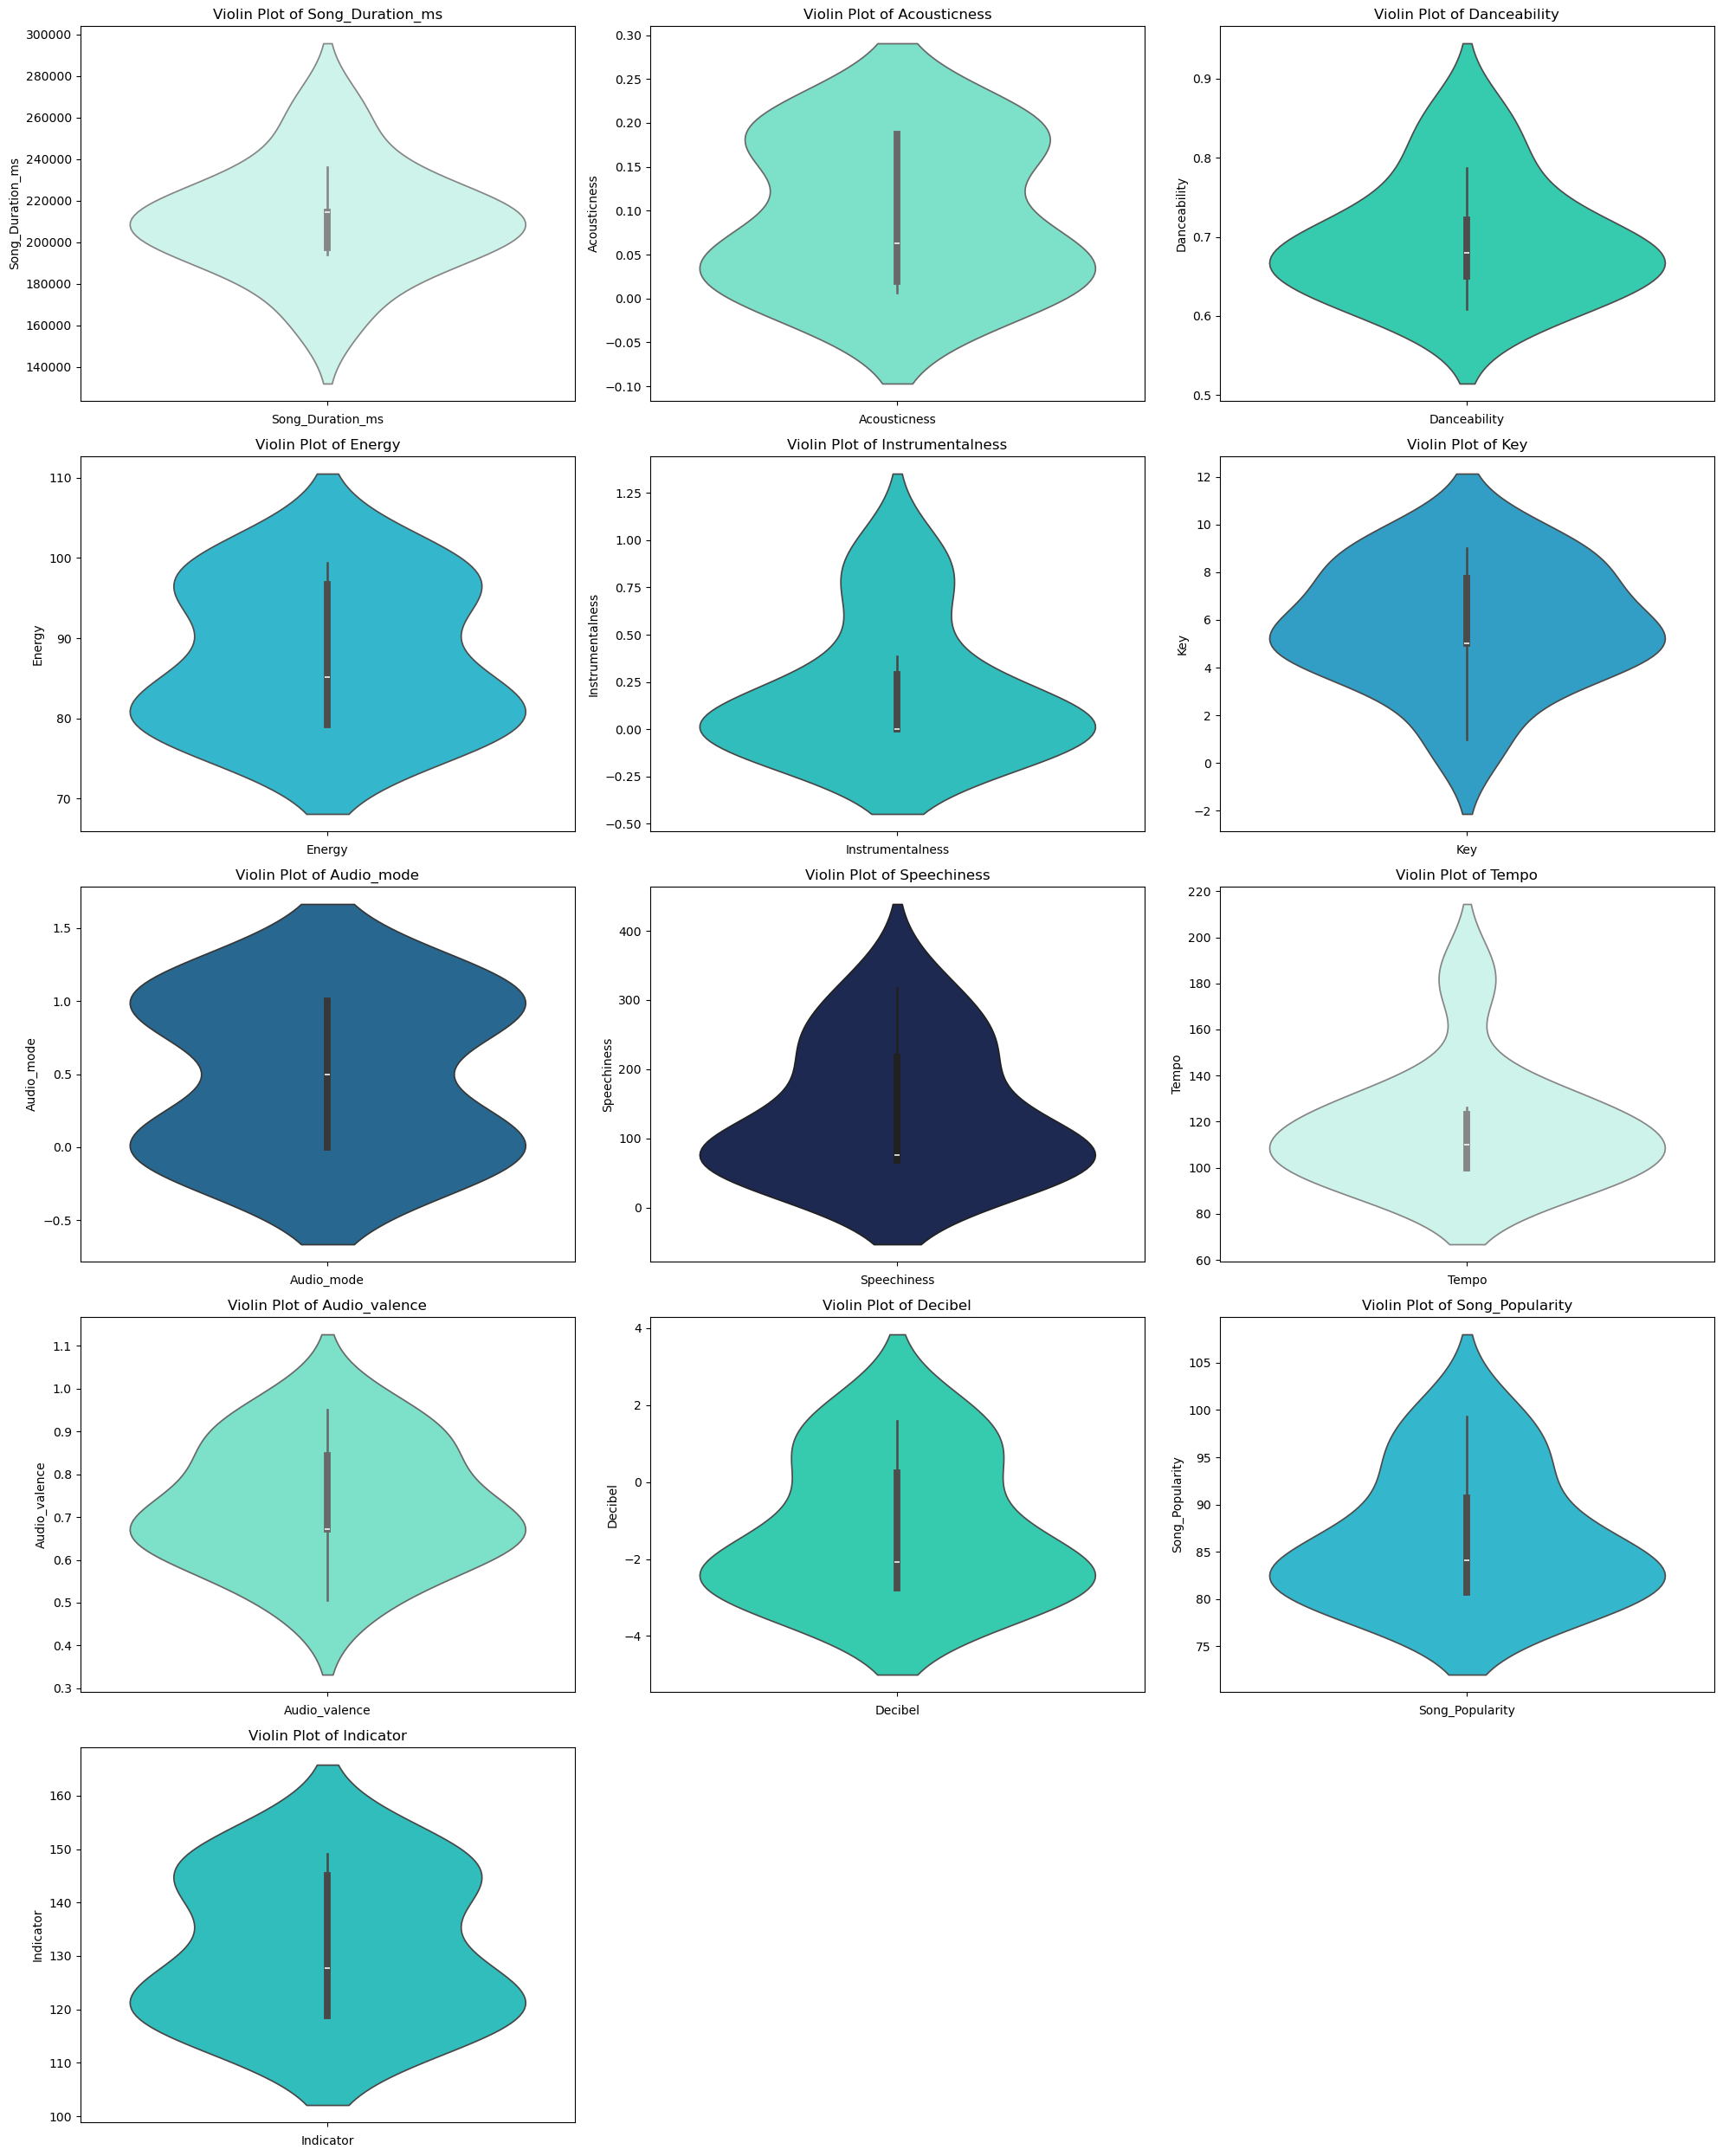

In [19]:
import math
# Custom color palette
custom_colors = ['#C7F9EE', '#6DF0D2', '#1DE4BD', '#1AC9E6', '#1BD4D4', '#19AADE', '#176BA0', '#142459']

# Calculate the number of rows needed
num_plots = len(num_cols)
num_cols_per_row = 3
num_rows = math.ceil(num_plots / num_cols_per_row)

# Set up the plotting space
plt.figure(figsize=(20, num_rows * 5))

# Create violin plots for each numerical column
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.violinplot(y=top_songs[col], color=custom_colors[i % len(custom_colors)])
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

C:\Users\sahan\AppData\Local\Temp\ipykernel_102992\3669118216.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Song_Popularity', y='Song_Name', data=bottom_songs, palette=custom_colors)
C:\Users\sahan\AppData\Local\Temp\ipykernel_102992\3669118216.py:10: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Song_Popularity', y='Song_Name', data=bottom_songs, palette=custom_colors)


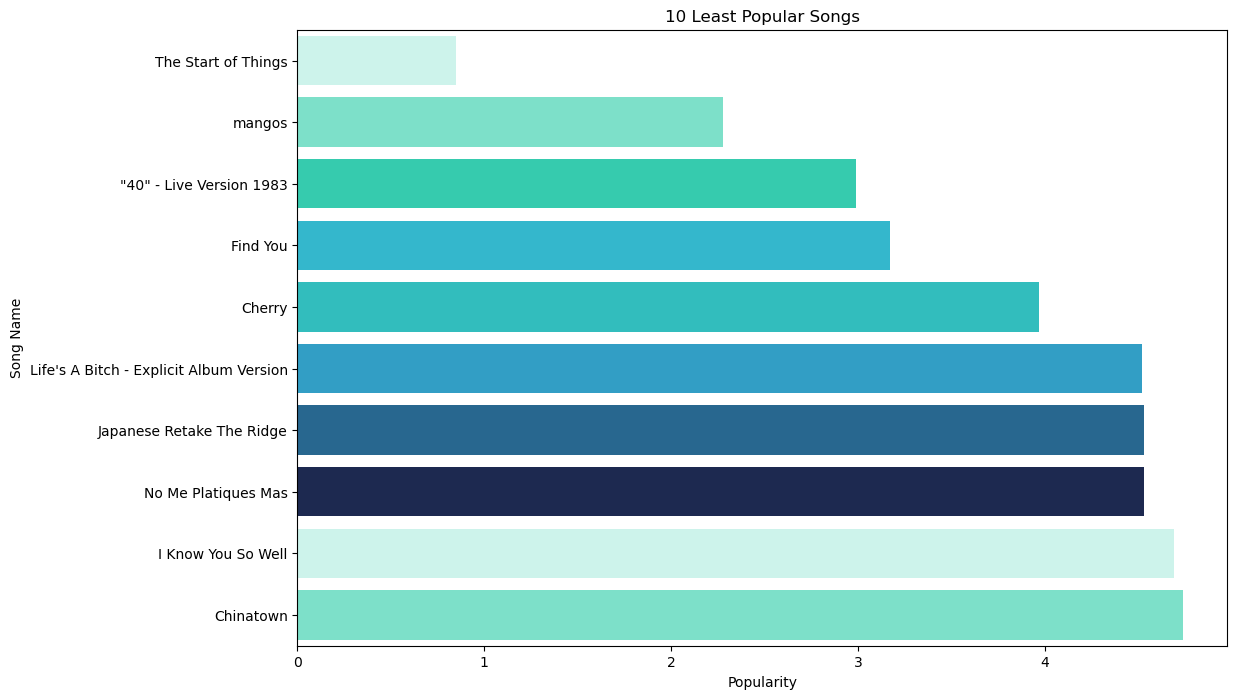

In [20]:
# Sort the DataFrame by 'Song_Popularity' in descending order
sorted_data = data_song_pop.sort_values(by='Song_Popularity', ascending=True)

# Select the top N most popular songs (e.g., top 10)
top_n = 10
bottom_songs = sorted_data.head(top_n)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Song_Popularity', y='Song_Name', data=bottom_songs, palette=custom_colors)
plt.title('10 Least Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.show()

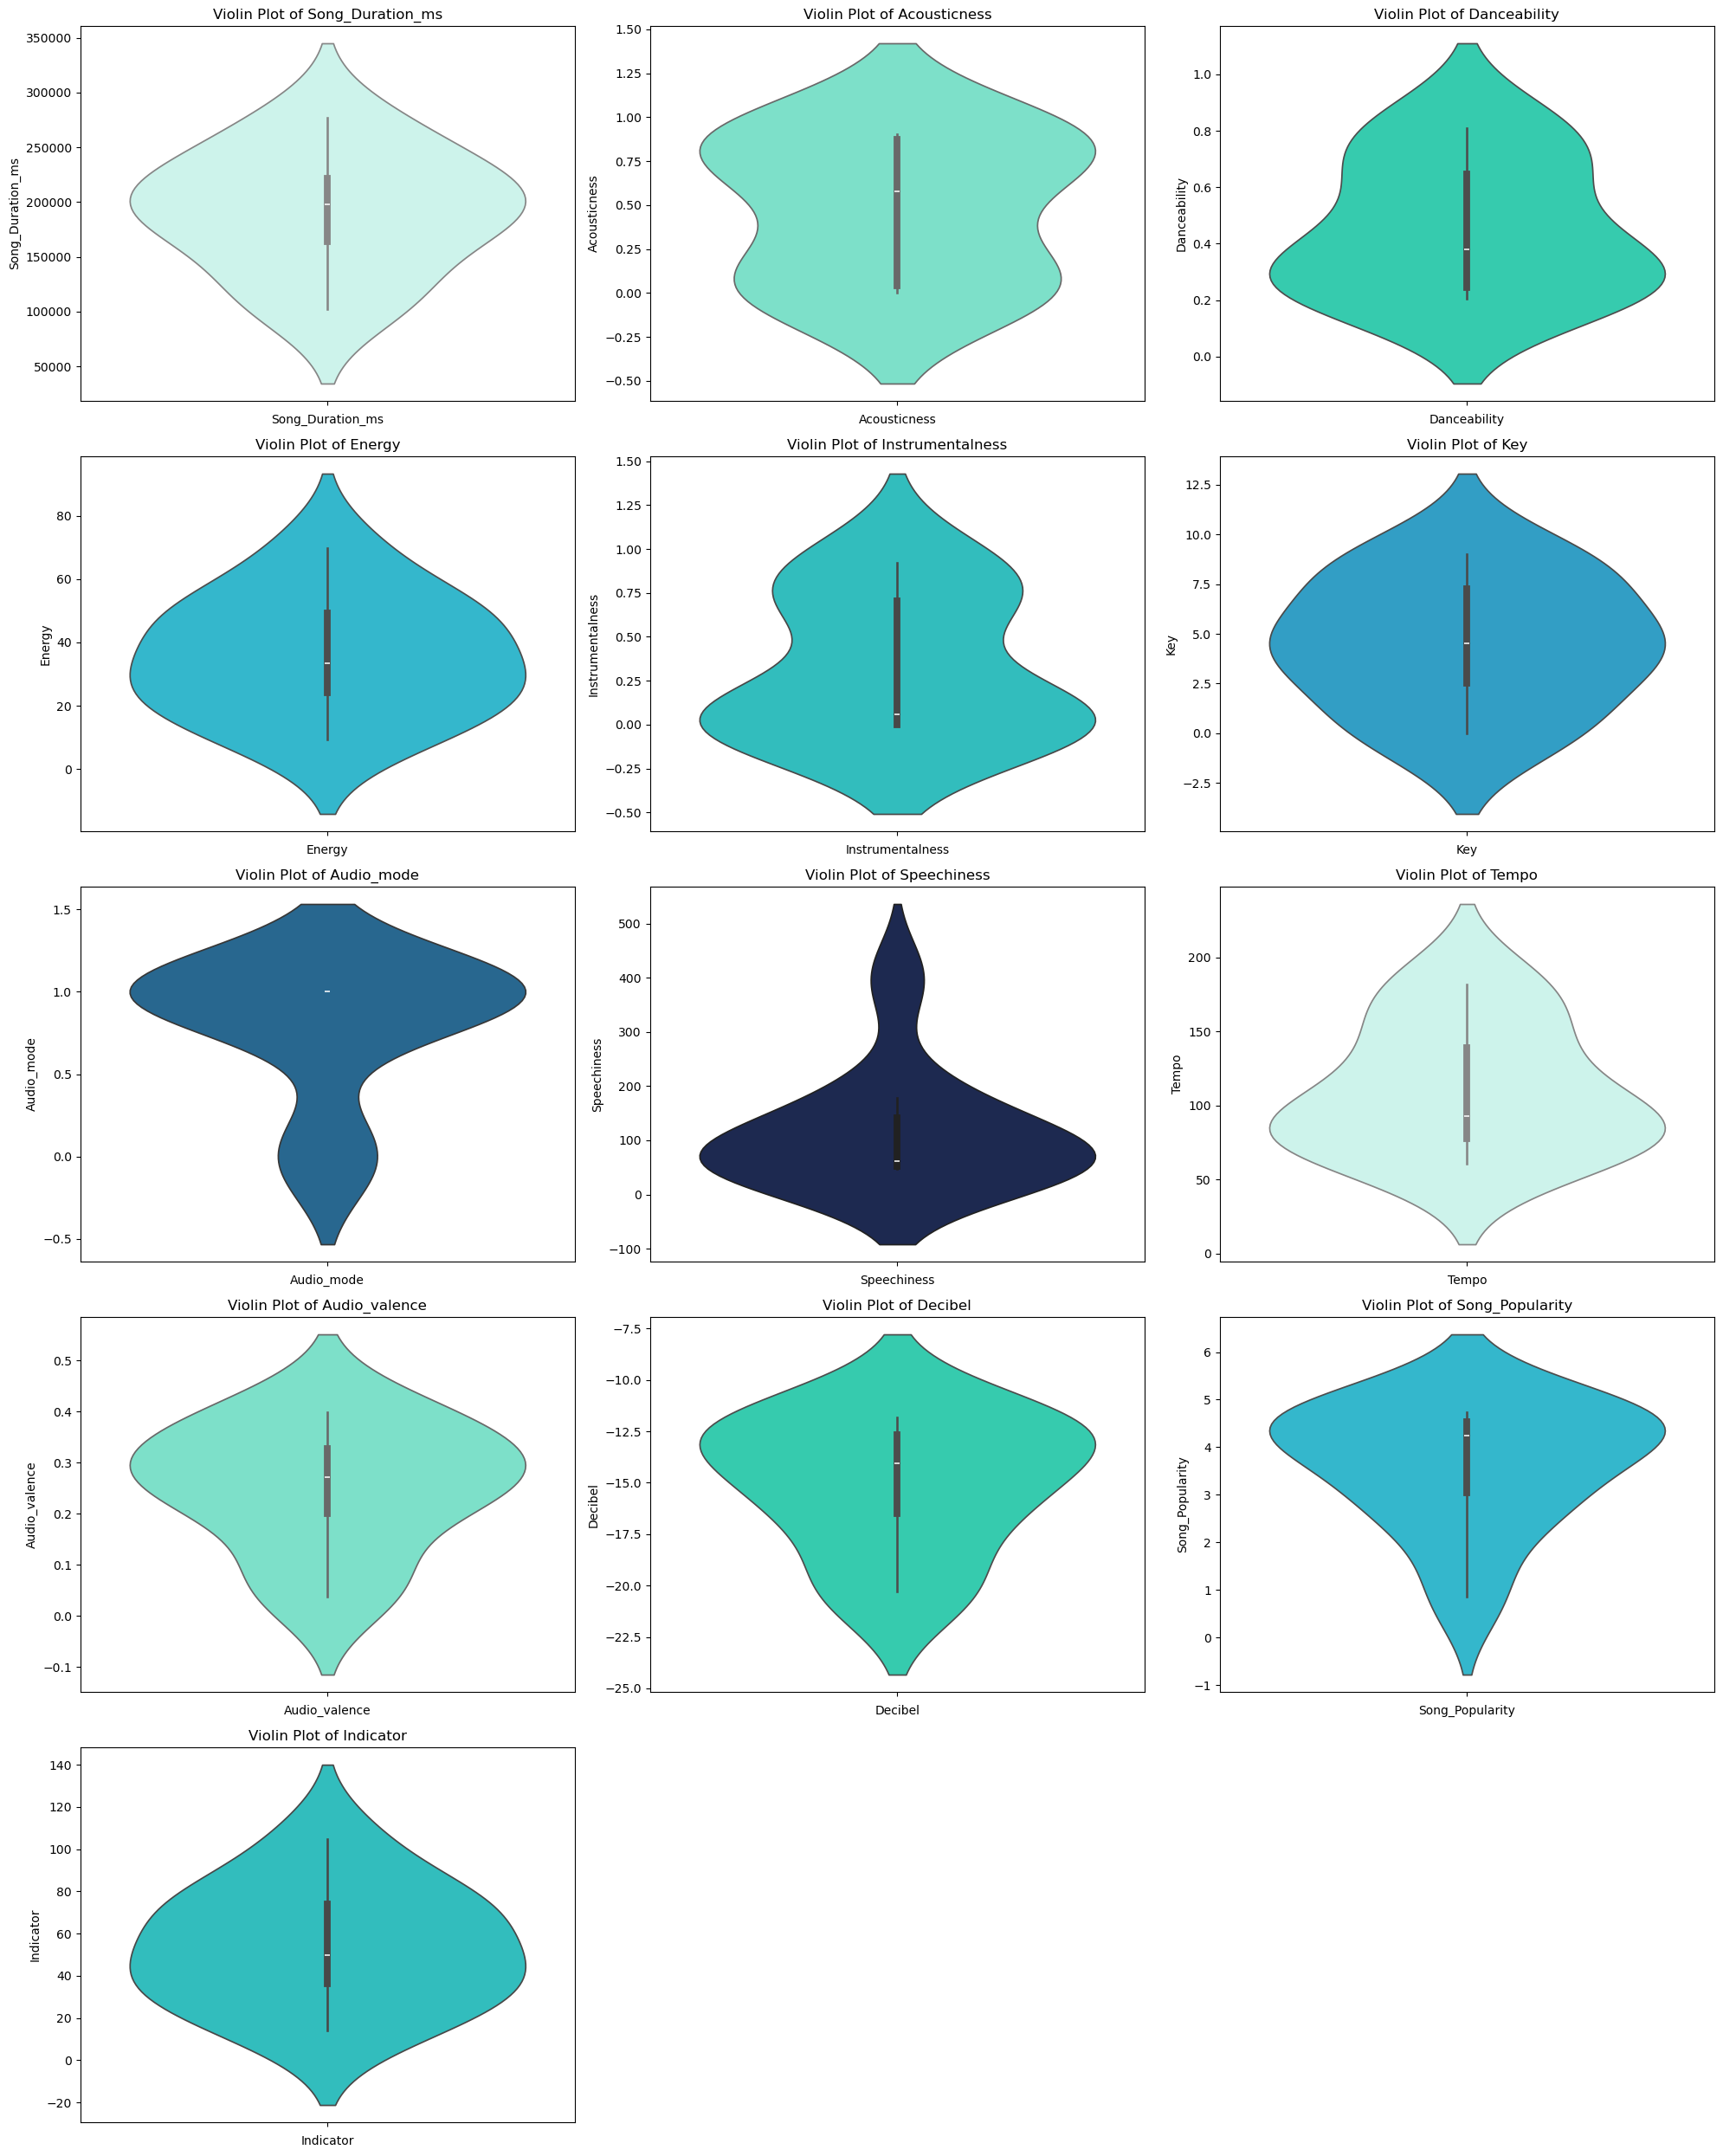

In [21]:
import math
# Custom color palette
custom_colors = ['#C7F9EE', '#6DF0D2', '#1DE4BD', '#1AC9E6', '#1BD4D4', '#19AADE', '#176BA0', '#142459']

# Calculate the number of rows needed
num_plots = len(num_cols)
num_cols_per_row = 3
num_rows = math.ceil(num_plots / num_cols_per_row)

# Set up the plotting space
plt.figure(figsize=(20, num_rows * 5))

# Create violin plots for each numerical column
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.violinplot(y=bottom_songs[col], color=custom_colors[i % len(custom_colors)])
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

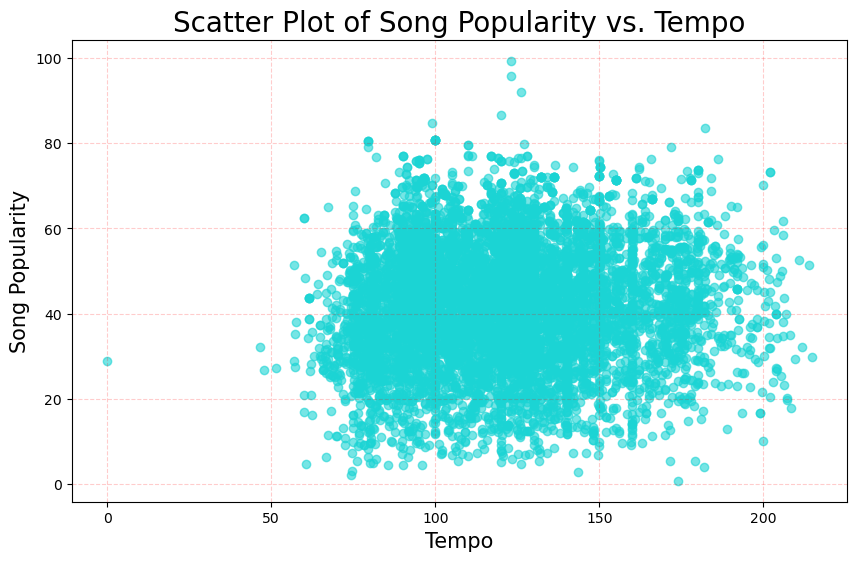

In [22]:
# Set size of the plot
plt.figure(figsize=(10, 6))

# Set style of the plot
plt.style.use('tableau-colorblind10')

# Set title for the plot (with fontsize change)
plt.title('Scatter Plot of Song Popularity vs. Tempo', fontsize=20)

# Set labels for x-axis and y-axis (with fontsize change)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('Song Popularity', fontsize=15)

# Set font size of ticks on the x-axis and y-axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Turn grid on or off (0 = off, 1 = on)
plt.grid(c='r', alpha=0.2, linestyle='--')

# Create scatter plot
plt.scatter(data_song_pop['Tempo'], data_song_pop['Song_Popularity'], color='#1BD4D4', alpha=0.6)

# Display the plot
plt.show()

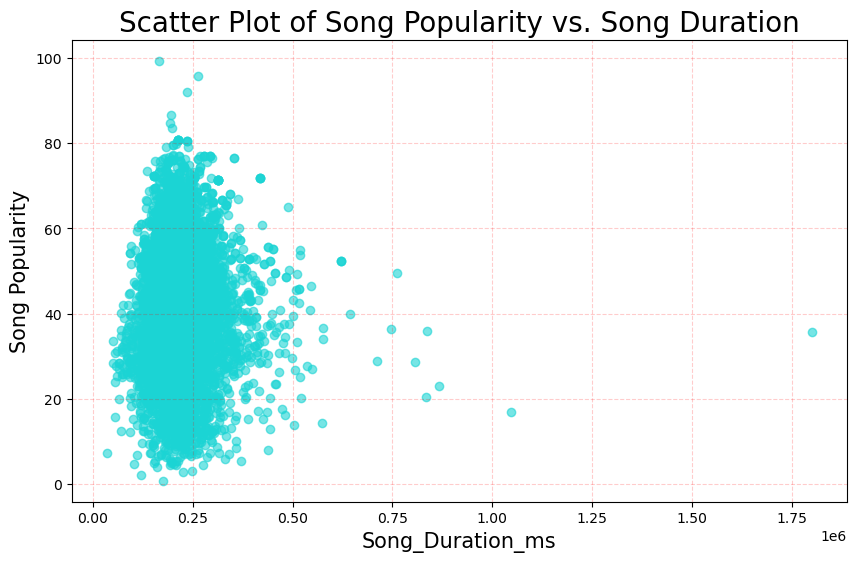

In [23]:
# Set size of the plot
plt.figure(figsize=(10, 6))

# Set style of the plot
plt.style.use('tableau-colorblind10')

# Set title for the plot (with fontsize change)
plt.title('Scatter Plot of Song Popularity vs. Song Duration', fontsize=20)

# Set labels for x-axis and y-axis (with fontsize change)
plt.xlabel('Song_Duration_ms', fontsize=15)
plt.ylabel('Song Popularity', fontsize=15)

# Set font size of ticks on the x-axis and y-axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Turn grid on or off (0 = off, 1 = on)
plt.grid(c='r', alpha=0.2, linestyle='--')

# Create scatter plot
plt.scatter(data_song_pop['Song_Duration_ms'], data_song_pop['Song_Popularity'], color='#1BD4D4', alpha=0.6)

# Display the plot
plt.show()

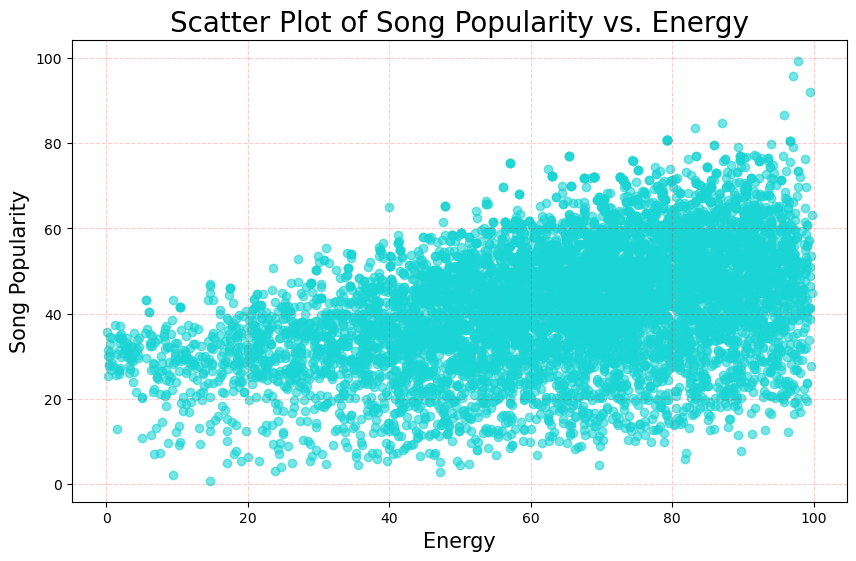

In [24]:
# Set size of the plot
plt.figure(figsize=(10, 6))

# Set style of the plot
plt.style.use('tableau-colorblind10')

# Set title for the plot (with fontsize change)
plt.title('Scatter Plot of Song Popularity vs. Energy', fontsize=20)

# Set labels for x-axis and y-axis (with fontsize change)
plt.xlabel('Energy', fontsize=15)
plt.ylabel('Song Popularity', fontsize=15)

# Set font size of ticks on the x-axis and y-axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Turn grid on or off (0 = off, 1 = on)
plt.grid(c='r', alpha=0.2, linestyle='--')

# Create scatter plot
plt.scatter(data_song_pop['Energy'], data_song_pop['Song_Popularity'], color='#1BD4D4', alpha=0.6)

# Display the plot
plt.show()

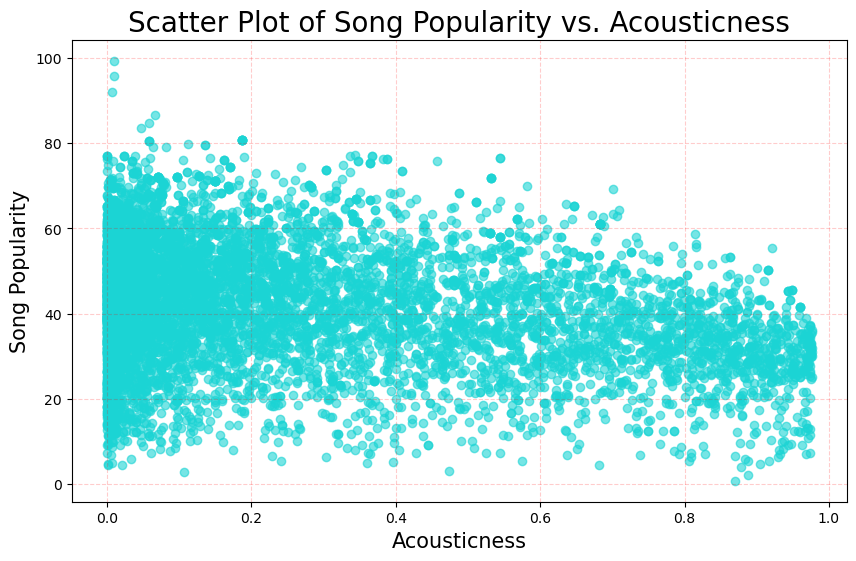

In [25]:
# Set size of the plot
plt.figure(figsize=(10, 6))

# Set style of the plot
plt.style.use('tableau-colorblind10')

# Set title for the plot (with fontsize change)
plt.title('Scatter Plot of Song Popularity vs. Acousticness', fontsize=20)

# Set labels for x-axis and y-axis (with fontsize change)
plt.xlabel('Acousticness', fontsize=15)
plt.ylabel('Song Popularity', fontsize=15)

# Set font size of ticks on the x-axis and y-axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Turn grid on or off (0 = off, 1 = on)
plt.grid(c='r', alpha=0.2, linestyle='--')

# Create scatter plot
plt.scatter(data_song_pop['Acousticness'], data_song_pop['Song_Popularity'], color='#1BD4D4', alpha=0.6)

# Display the plot
plt.show()

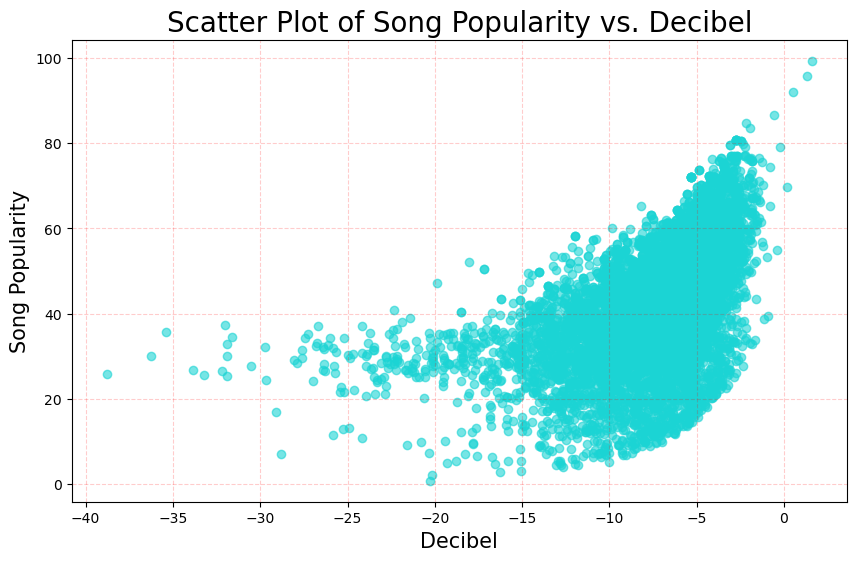

In [26]:
# Set size of the plot
plt.figure(figsize=(10, 6))

# Set style of the plot
plt.style.use('tableau-colorblind10')

# Set title for the plot (with fontsize change)
plt.title('Scatter Plot of Song Popularity vs. Decibel', fontsize=20)

# Set labels for x-axis and y-axis (with fontsize change)
plt.xlabel('Decibel', fontsize=15)
plt.ylabel('Song Popularity', fontsize=15)

# Set font size of ticks on the x-axis and y-axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Turn grid on or off (0 = off, 1 = on)
plt.grid(c='r', alpha=0.2, linestyle='--')

# Create scatter plot
plt.scatter(data_song_pop['Decibel'], data_song_pop['Song_Popularity'], color='#1BD4D4', alpha=0.6)

# Display the plot
plt.show()

In [27]:

# Initialize a flag to keep track if any negative value is found
negative_values_exist = False

# Iterate over each column
for column in data_song_pop[num_cols].columns:
    # Check if any value in the column is negative
    if (data_song_pop[num_cols][column] < 0).any():
        # Set the flag to True if negative values are found
        negative_values_exist = True
        # Print the column name
        print(f"Column '{column}' contains negative values.")

# If no negative values were found in any column, print a message
if not negative_values_exist:
    print("No negative values found in any column.")

Column 'Decibel' contains negative values.


### Step 3: Train and Test Split<a id="part5"></a>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    data_song_pop_tts.drop(['Song_Popularity', 'Code', 'Song_Name'], axis=1),
    data_song_pop_tts['Song_Popularity'],  
    test_size=0.3, random_state=0
)


X_train.shape, X_test.shape

((13184, 15), (5651, 15))

### Step 4: Missing Value Imputation<a id="part6"></a>

In [29]:
# Assuming data_song_pop is your DataFrame

# Get the list of categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Dictionary to store unique values
unique_values_dict = {}

# Iterate through each categorical column and store unique values
for column in categorical_columns:
    unique_values_dict[column] = X_train[column].unique()

# Print unique values for each categorical column
for column, unique_values in unique_values_dict.items():
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Liveness': ['181.7104' '112.296409' '120.165444' ... '108.805761' '105.719524'
 '108.035236']
Unique values in 'Dynamism': ['Hi' 'Med' 'Medium' 'Lo' nan 'Extra' 'High' 'Low' 'm' 'high' 'l' 'h']
Unique values in 'Loudness': ['Roar' 'Blare' 'Clang' 'Babble' 'Boom' '?' 'Rumble' 'Buzz' 'Hum' 'Blast'
 'Rustle' 'Deafening' 'Chatter' 'Drone' 'Mumble' 'Mutter' 'Whisper'
 'Ear-splitting']


In [30]:
standardize_map = {
    'High': 'High', 'Hi': 'High', 'high': 'High', 'h': 'High',
    'Medium': 'Medium', 'Med': 'Medium', 'm': 'Medium',
    'Low': 'Low', 'Lo': 'Low', 'l': 'Low',
    'Extra': 'Extra'  # Assuming 'Extra' is a valid unique category
}

# Step 4: Apply Mapping
X_train['Dynamism'] = X_train['Dynamism'].map(standardize_map)

# Verify the cleaning process
print("Unique values in 'Dynamism' after cleaning:", X_train['Dynamism'].unique())

Unique values in 'Dynamism' after cleaning: ['High' 'Medium' 'Low' nan 'Extra']


In [31]:
# replace ? by np.nan
X_train = X_train.replace('?', np.nan) # np.nan is used so that the machine can understand instead of naN which is still a string
# inplace = TRUE : is not a universal python code and  may cause an error if anither person uses

# data.isnull() - boolean qn to ask every data Flase: 0, True: 1
X_train.isnull().sum()
# data.isnull().sum().sum() to get the sum of null values

Song_Duration_ms       0
Acousticness           0
Danceability        2038
Energy                 0
Instrumentalness       0
Key                    0
Liveness               1
Audio_mode             0
Speechiness         3935
Tempo                  0
Audio_valence          0
Dynamism            2571
Decibel                0
Loudness            1330
Indicator              0
dtype: int64

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13184 entries, 4659 to 2732
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song_Duration_ms  13184 non-null  int64  
 1   Acousticness      13184 non-null  float64
 2   Danceability      11146 non-null  float64
 3   Energy            13184 non-null  float64
 4   Instrumentalness  13184 non-null  float64
 5   Key               13184 non-null  int64  
 6   Liveness          13183 non-null  object 
 7   Audio_mode        13184 non-null  int64  
 8   Speechiness       9249 non-null   float64
 9   Tempo             13184 non-null  float64
 10  Audio_valence     13184 non-null  float64
 11  Dynamism          10613 non-null  object 
 12  Decibel           13184 non-null  float64
 13  Loudness          11854 non-null  object 
 14  Indicator         13184 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 1.6+ MB


In [33]:
X_train.head()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Indicator
4659,200133,0.296940,0.71874,70.80,0.00000,7,181.7104,0,534.00,105.084,0.417,High,-6.908,Roar,106.20
4389,243306,0.048706,NaN,58.90,0.00000,1,112.296409,1,204.00,95.029,0.159,Medium,-4.665,Blare,88.35
10549,145411,0.629160,0.65637,53.10,0.00412,9,120.165444,1,67.80,140.657,0.531,Medium,-8.452,Clang,79.65
11105,153600,0.886900,0.76230,1.61,0.91400,4,123.8769,1,NaN,75.047,0.700,Low,-14.233,Babble,2.42
3183,206946,0.223440,0.56430,57.60,0.00000,1,176.89,1,94.65,143.943,0.438,Medium,-6.792,Roar,86.40


In [34]:
# re-cast( changing to a different type ) some variables to the correct types 
X_train['Liveness'] = X_train['Liveness'].astype('float')

X_train.head()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Indicator
4659,200133,0.296940,0.71874,70.80,0.00000,7,181.710400,0,534.00,105.084,0.417,High,-6.908,Roar,106.20
4389,243306,0.048706,NaN,58.90,0.00000,1,112.296409,1,204.00,95.029,0.159,Medium,-4.665,Blare,88.35
10549,145411,0.629160,0.65637,53.10,0.00412,9,120.165444,1,67.80,140.657,0.531,Medium,-8.452,Clang,79.65
11105,153600,0.886900,0.76230,1.61,0.91400,4,123.876900,1,NaN,75.047,0.700,Low,-14.233,Babble,2.42
3183,206946,0.223440,0.56430,57.60,0.00000,1,176.890000,1,94.65,143.943,0.438,Medium,-6.792,Roar,86.40


In [35]:
cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
X_train[cat_cols].isnull().mean().sort_values()

Loudness    0.100880
Dynamism    0.195009
dtype: float64

#### Mode/Frequent Imputation


In [36]:
# let's create a frequent imputation transformer

#mode_imputer = mdi.CategoricalImputer(variables=['Loudness', 'Dynamism'], imputation_method = 'frequent') # what is mdi?

#mode_imputer.fit(X_train)

In [37]:
# dictionary with the mappings for each variable
#mode_imputer.imputer_dict_

In [38]:
#X_train[['Loudness', 'Dynamism']].isnull().mean()

In [39]:
# insert code here
#X_train = mode_imputer.transform(X_train)
#display(X_train) # print will not display the data properly
#X_test = mode_imputer.transform(X_test)
#display(X_test)

In [40]:
X_train[['Loudness', 'Dynamism']].isnull().mean()

Loudness    0.100880
Dynamism    0.195009
dtype: float64

#### Mean/Median Imputation


In [41]:
# let's separate into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(
   # data_song_pop_missing.drop('A17', axis=1), data_song_pop_missing['A17'], test_size=0.3, random_state=0) # to imput null values to put into the feature engine for testing 

In [42]:
# let's create a median imputer

#median_imputer = MeanMedianImputer(imputation_method='median',
                                   #variables=['Danceability', 'Speechiness']) #snake case when spacing is replaced with _ / when words are all capitalised, camel casing normally used with classes

#median_imputer.fit(X_train)

In [43]:
# let's inspect the dictionary with the mappings for each variable
#median_imputer.imputer_dict_

In [44]:
# transform the data - changes are officially made
#X_train = median_imputer.transform(X_train)
#X_test = median_imputer.transform(X_test)

In [45]:
# check that null values were replaced
#X_train[['Danceability', 'Speechiness']].isnull().mean()

In [46]:
# show all the methods of encoding transforming and comment out the code that you are not use but do show that you did try to see was the most suitable method

#### Pipeline Imputation

In [47]:
# first we need to make a list with the numerical vars
features_num_median = ['Danceability', 'Speechiness', 'Liveness', 'Decibel']

features_cat_frequent = ['Loudness', 'Dynamism']

In [48]:
# Instantiate each imputer within a pipeline
pipe = Pipeline(steps=[
    ('imp_num_median', MeanMedianImputer(imputation_method='median', variables=features_num_median)),
    ('imp_cat_frequent', CategoricalImputer(variables=features_cat_frequent, imputation_method='frequent'))
])

In [49]:
# now we fit the preprocessor
pipe.fit(X_train)

Pipeline(steps=[('imp_num_median',
                 MeanMedianImputer(variables=['Danceability', 'Speechiness',
                                              'Liveness', 'Decibel'])),
                ('imp_cat_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Loudness', 'Dynamism']))])

In [50]:
# and now we impute the data
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [51]:
# Note that feature_engine maintain the order of original columns and return a dataframe
X_train.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

### Step 5: Categorical Data Encoding<a id="part1"></a>

In [52]:
# find numerical variables
cat_cols = [c for c in X_train.columns if X_train[c].dtypes =='O']
X_train[cat_cols].isnull().mean().sort_values()

Dynamism    0.0
Loudness    0.0
dtype: float64

In [53]:
# Note that feature_engine maintain the order of original columns and return a dataframe
X_train.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

In [54]:
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered',
    variables=['Loudness', 'Dynamism'])

In [55]:
ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['Loudness', 'Dynamism'])

In [56]:
ordinal_enc.encoder_dict_

{'Loudness': {'Mutter': 0,
  'Hum': 1,
  'Drone': 2,
  'Chatter': 3,
  'Buzz': 4,
  'Rustle': 5,
  'Babble': 6,
  'Mumble': 7,
  'Whisper': 8,
  'Rumble': 9,
  'Clang': 10,
  'Roar': 11,
  'Blare': 12,
  'Boom': 13,
  'Blast': 14,
  'Deafening': 15,
  'Ear-splitting': 16},
 'Dynamism': {'Low': 0, 'Medium': 1, 'High': 2, 'Extra': 3}}

In [57]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

pd.DataFrame(X_train, columns=cat_cols).info()

<class 'pandas.core.frame.DataFrame'>
Index: 13184 entries, 4659 to 2732
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dynamism  13184 non-null  int64
 1   Loudness  13184 non-null  int64
dtypes: int64(2)
memory usage: 309.0 KB


C:\Users\sahan\AppData\Roaming\Python\Python311\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) Loudness, Dynamism.
  warnings.warn(


In [58]:
X_train.head()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Indicator
4659,200133,0.296940,0.71874,70.80,0.00000,7,181.710400,0,534.00,105.084,0.417,2,-6.908,11,106.20
4389,243306,0.048706,0.63756,58.90,0.00000,1,112.296409,1,204.00,95.029,0.159,1,-4.665,12,88.35
10549,145411,0.629160,0.65637,53.10,0.00412,9,120.165444,1,67.80,140.657,0.531,1,-8.452,10,79.65
11105,153600,0.886900,0.76230,1.61,0.91400,4,123.876900,1,83.55,75.047,0.700,0,-14.233,6,2.42
3183,206946,0.223440,0.56430,57.60,0.00000,1,176.890000,1,94.65,143.943,0.438,1,-6.792,11,86.40


#### Target Mean Encoding

In [59]:
# Task 6: Encode X_train & X_test using target mean encoding
#mean_enc = MeanEncoder(variables=None)

In [60]:
#mean_enc.fit(X_train, y_train)

In [61]:
#mean_enc.variables

In [62]:
#X_train_enc = mean_enc.transform(X_train)
#X_test_enc = mean_enc.transform(X_test)

#X_train_enc.head()

In [63]:
#X_train.info()

In [64]:
#X_train.shape, X_test.shape

#### One-Hot Encoding

In [65]:
#ohe_enc = LinearRegression()
#ohe_enc = OneHotEncoder(
    #top_categories=None,
    #drop_last=False)  


In [66]:
#ohe_enc.fit(X_train)

In [67]:
#ohe_enc.variables

In [68]:
#check for columns

In [69]:
#X_train_ohe= ohe_enc.transform(X_train)
#X_test_ohe = ohe_enc.transform(X_test)

#X_train_ohe.head()

In [70]:
# Build Linear Regression Model
#lm_reg_ohe = linear_model.LinearRegression()
#lm_reg_ohe.fit(X_train_ohe, y_train)

# Evaluate the Linear Regression Model using Mean Absolute Error (MAE)
# The lower MAE, the better model performance
#print('train_mae:', mean_absolute_error(y_train, lm_reg_ohe.predict(X_train_ohe)), 
      #'\n test_mae:', mean_absolute_error(y_test, lm_reg_ohe.predict(X_test_ohe)))

In [71]:
# first we need to make a list with the numerical vars
#features_num_median = ['Danceability', 'Speechiness', 'Liveness']

features_num_median = ['Dynamism', 'Loudness']

In [72]:
# Instantiate each imputer within a pipeline
pipe = Pipeline(steps=[
    ('imp_num_median', MeanMedianImputer(imputation_method='median', variables=features_num_median))
])

In [73]:
# now we fit the preprocessor
pipe.fit(X_train)

Pipeline(steps=[('imp_num_median',
                 MeanMedianImputer(variables=['Dynamism', 'Loudness']))])

In [74]:
# and now we impute the data
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

### Step 6: Data Preprocessing<a id="part4"></a>

In [75]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Price quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

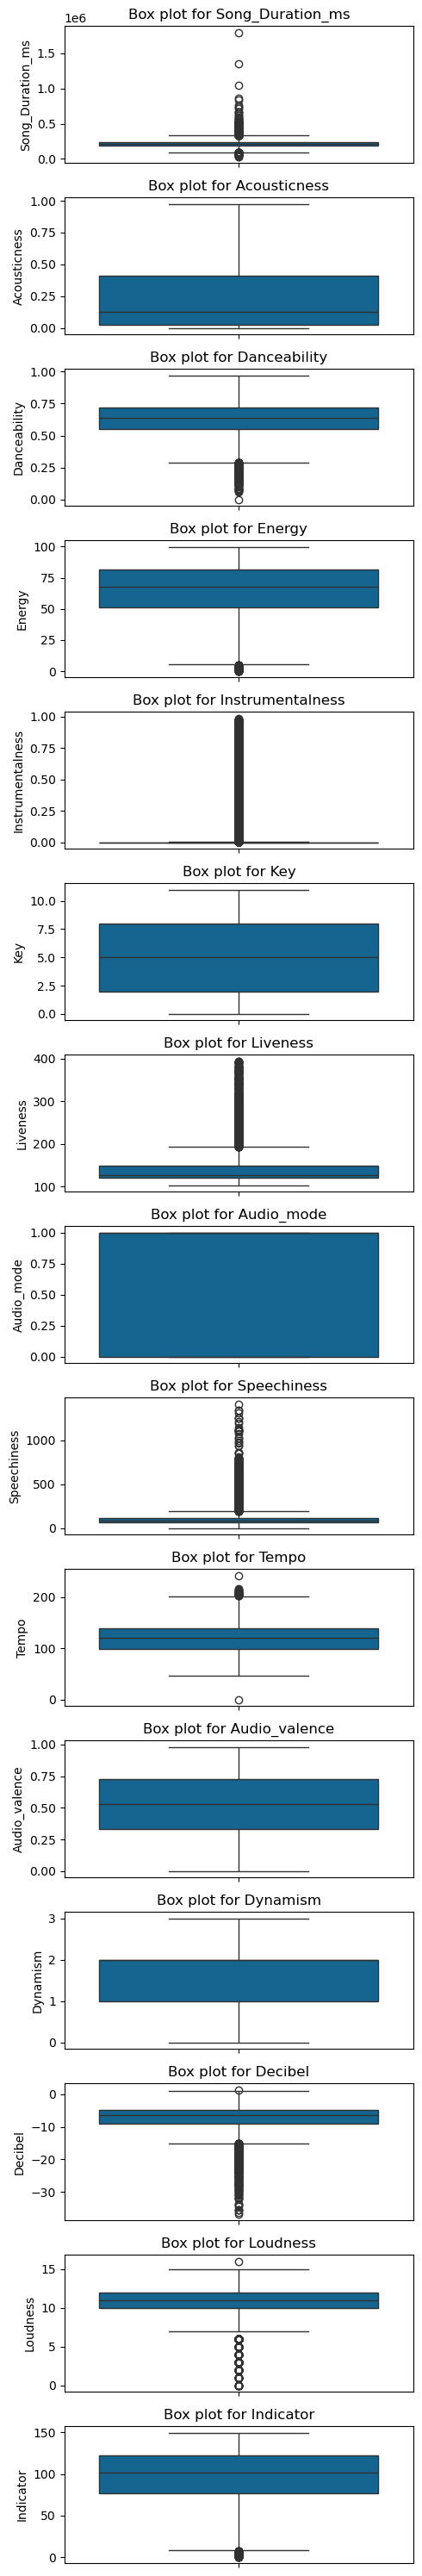

In [76]:

# Set up the plot figure
plt.figure(figsize=(5, 30))

# Iterate over the variables and create a box plot for each
for i, variable in enumerate(X_train.columns, 1):
    plt.subplot(len(X_train.columns), 1, i)  # Create a subplot for each variable
    sns.boxplot(y=X_train[variable])
    plt.title(f'Box plot for {variable}')
    plt.ylabel(variable)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### Winsorisation

In [77]:
# create the capper

#windsorizer = Winsorizer(capping_method ='quantiles', # iqr removed most of the outliers, compared to mad, quantile and gaussian
                      #  tail='both', # cap left, right or both tails
                      #  fold =0.05,
                      #  variables=['Decibel', 'Speechiness', 'Instrumentalness', 'Acousticness','Song_Duration_ms', 'Danceability', 'Energy', 
                      #'Liveness', 'Tempo', 'Audio_valence',
                     # 'Indicator'])

#windsorizer.fit(X_train)

In [78]:
#X_train = windsorizer.transform(X_train)

#### Capping Outliers

In [79]:
# create the capper

#windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
                          #tail='both', # cap left, right or both tails 
                         # fold=3,
                          #variables=['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy',
       #'Instrumentalness', 'Key', 'Liveness', 'Audio_mode', 'Speechiness',
       #'Tempo', 'Audio_valence', 'Dynamism', 'Decibel', 'Loudness',
       #'Indicator'])

#windsorizer.fit(X_train)

In [80]:
# create the capper

windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=[ 'Danceability', 'Energy',
        'Key',
       'Tempo', 'Audio_valence', 'Dynamism', 
       'Indicator'])

windsorizer.fit(X_train)

Winsorizer(tail='both',
           variables=['Danceability', 'Energy', 'Key', 'Tempo', 'Audio_valence',
                      'Dynamism', 'Indicator'])

In [81]:
X_train = windsorizer.transform(X_train)

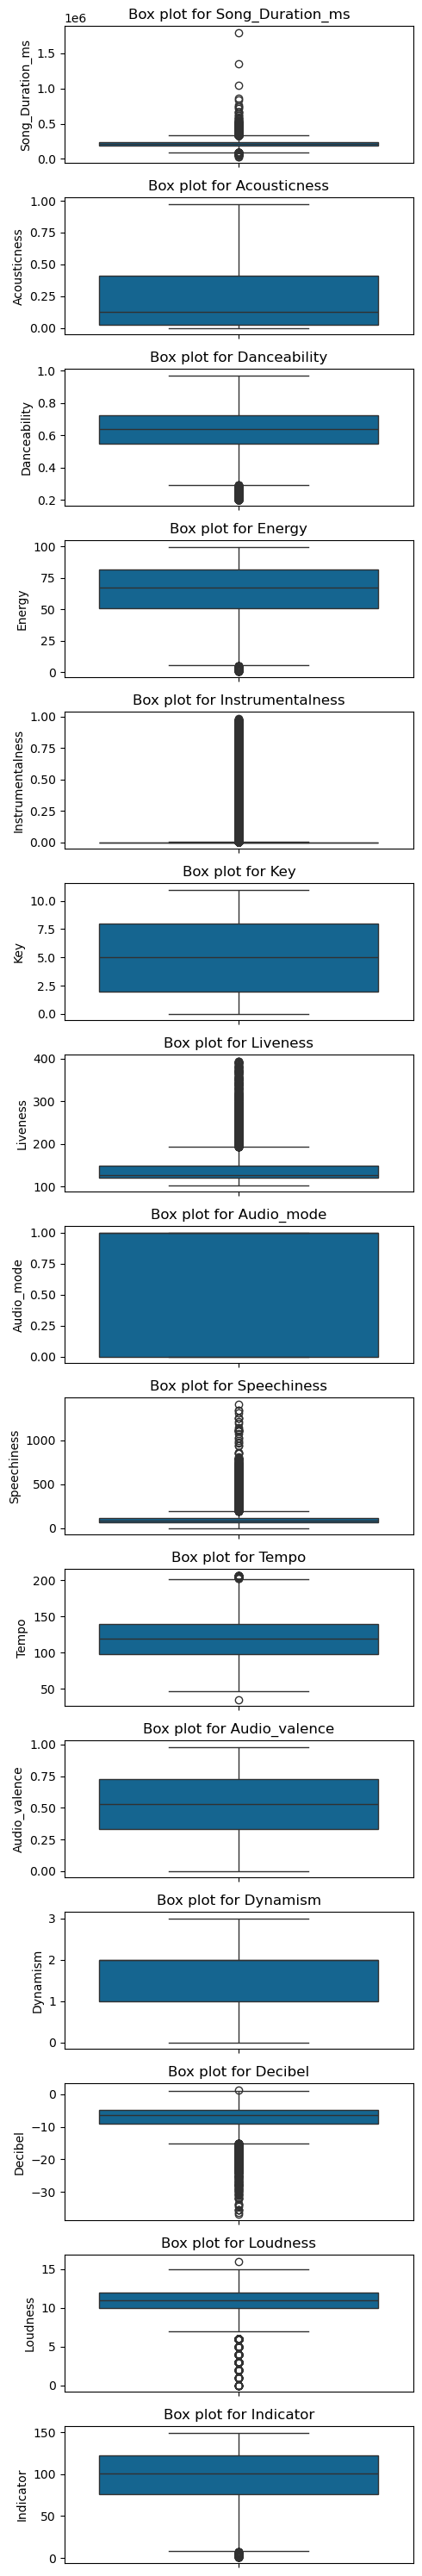

In [82]:
variables=[ 'Danceability', 'Energy',
        'Key',
       'Tempo', 'Audio_valence', 'Dynamism', 
       'Indicator']
# Set up the plot figure
plt.figure(figsize=(5, 30))

# Iterate over the variables and create a box plot for each
for i, variable in enumerate(X_train.columns, 1):
    plt.subplot(len(X_train.columns), 1, i)  # Create a subplot for each variable
    sns.boxplot(y=X_train[variable])
    plt.title(f'Box plot for {variable}')
    plt.ylabel(variable)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### Outlier Trimming

In [83]:
def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [84]:
#RM_upper_limit, RM_lower_limit = find_boundaries(X_train, 'Song_Duration_ms', 1.5)
#RM_upper_limit, RM_lower_limit

In [85]:
#outliers_RM = np.where(X_train['Song_Duration_ms'] > RM_upper_limit, True,
#                       np.where(X_train['Song_Duration_ms'] < RM_lower_limit, True, False))

In [86]:
# let's trim the dataset by removing only RM outliers

#X_train_trimmed = X_train.loc[~outliers_RM ]

#X_train.shape, X_train_trimmed.shape

#### Numeric columns, +ve, -ve

In [87]:
# find numerical variables
num_cols = [c for c in X_train.columns if X_train[c].dtypes !='O']
X_train[num_cols].isnull().mean().sort_values()

Song_Duration_ms    0.0
Acousticness        0.0
Danceability        0.0
Energy              0.0
Instrumentalness    0.0
Key                 0.0
Liveness            0.0
Audio_mode          0.0
Speechiness         0.0
Tempo               0.0
Audio_valence       0.0
Dynamism            0.0
Decibel             0.0
Loudness            0.0
Indicator           0.0
dtype: float64

In [88]:
# Step 1: Identify non-positive values
non_positive_values = X_train[['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy', 'Key', 'Audio_mode', 'Speechiness', 'Tempo', 'Audio_valence', 'Indicator']] <= 0
non_positive_columns = non_positive_values.any()
print("Columns with non-positive values:\n", non_positive_columns[non_positive_columns].index.tolist())
for col in non_positive_columns[non_positive_columns].index:
    print(f"\nRows with non-positive values in column '{col}':")
    

Columns with non-positive values:
 ['Key', 'Audio_mode', 'Speechiness', 'Audio_valence']

Rows with non-positive values in column 'Key':

Rows with non-positive values in column 'Audio_mode':

Rows with non-positive values in column 'Speechiness':

Rows with non-positive values in column 'Audio_valence':


#### Logarithmic Transformation

In [89]:
# initialize the transformer
lt = LogTransformer(variables=['Song_Duration_ms', 'Acousticness', 'Danceability',   
       'Energy', 
       'Indicator'])

# fit transformer to data set
lt.fit(X_train)

LogTransformer(variables=['Song_Duration_ms', 'Acousticness', 'Danceability',
                          'Energy', 'Indicator'])

In [90]:
# transform variables within our data set
data_tf_lt = lt.transform(X_train)

C:\Users\sahan\AppData\Roaming\Python\Python311\site-packages\feature_engine\transformation\log.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12.20673742 12.40207519 11.88731949 ... 12.17493279 12.40568141
 12.42499128]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, self.variables_] = np.log(X.loc[:, self.variables_])


C:\Users\sahan\AppData\Local\Temp\ipykernel_102992\1787133154.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


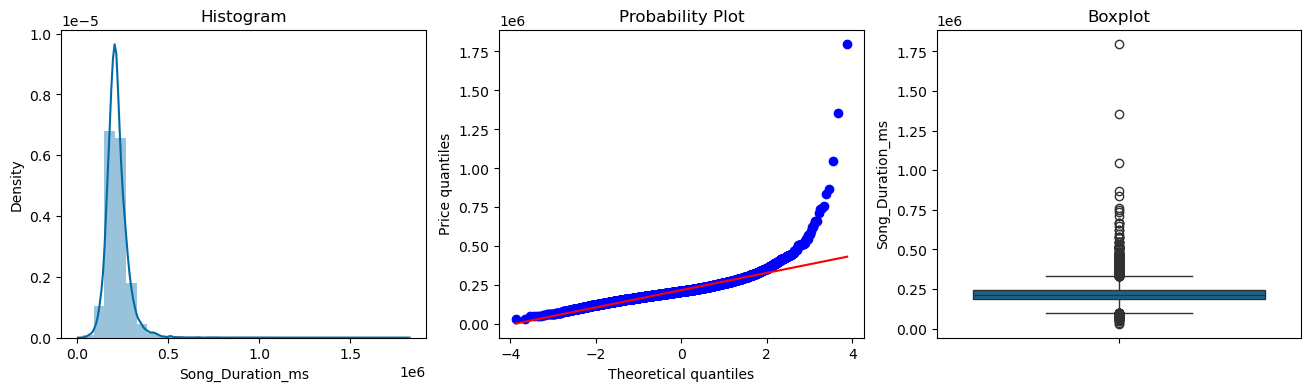

In [91]:
diagnostic_plots(X_train, 'Song_Duration_ms')

C:\Users\sahan\AppData\Local\Temp\ipykernel_102992\1787133154.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


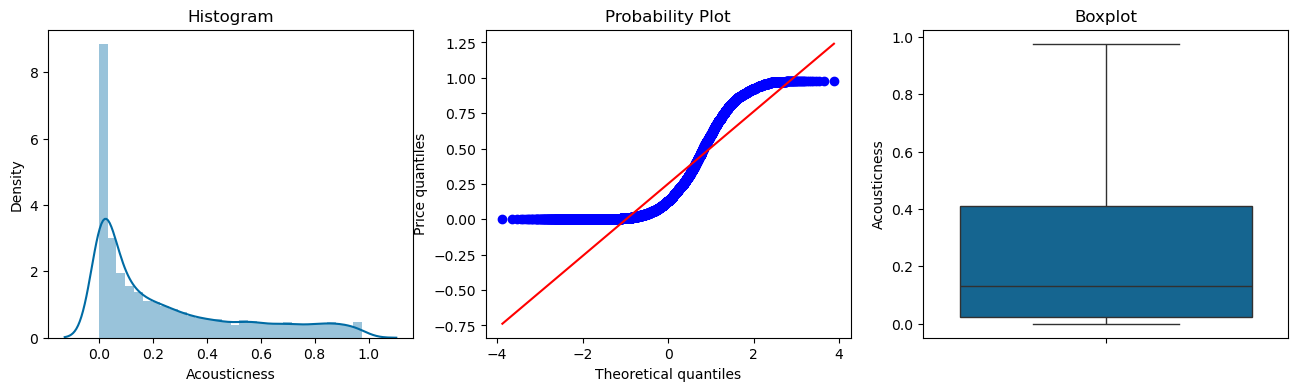

In [92]:
diagnostic_plots(X_train, 'Acousticness')

C:\Users\sahan\AppData\Local\Temp\ipykernel_102992\1787133154.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


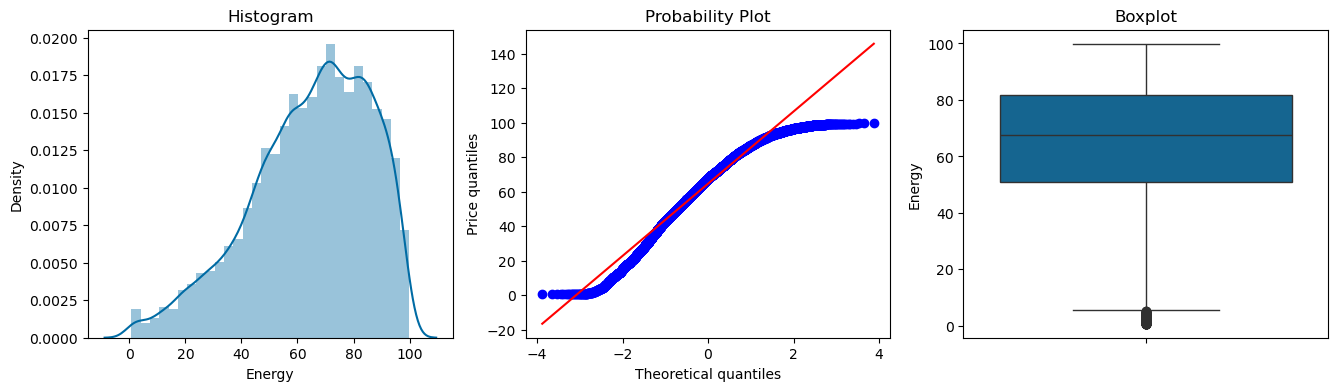

In [93]:
diagnostic_plots(X_train, 'Energy')

C:\Users\sahan\AppData\Local\Temp\ipykernel_102992\1787133154.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


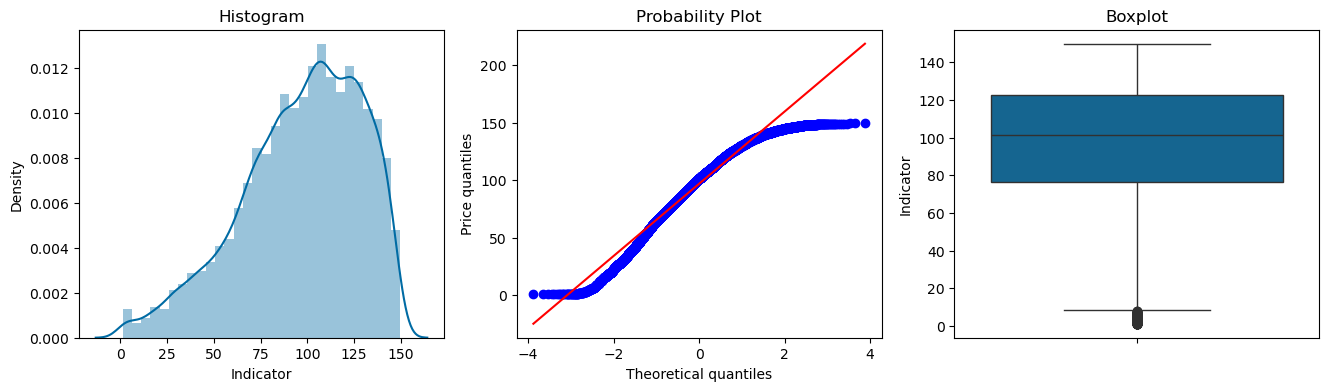

In [94]:
diagnostic_plots(X_train, 'Indicator')

array([[<Axes: title={'center': 'Song_Duration_ms'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>],
       [<Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Liveness'}>,
        <Axes: title={'center': 'Audio_mode'}>],
       [<Axes: title={'center': 'Speechiness'}>,
        <Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Audio_valence'}>,
        <Axes: title={'center': 'Dynamism'}>],
       [<Axes: title={'center': 'Decibel'}>,
        <Axes: title={'center': 'Loudness'}>,
        <Axes: title={'center': 'Indicator'}>, <Axes: >]], dtype=object)

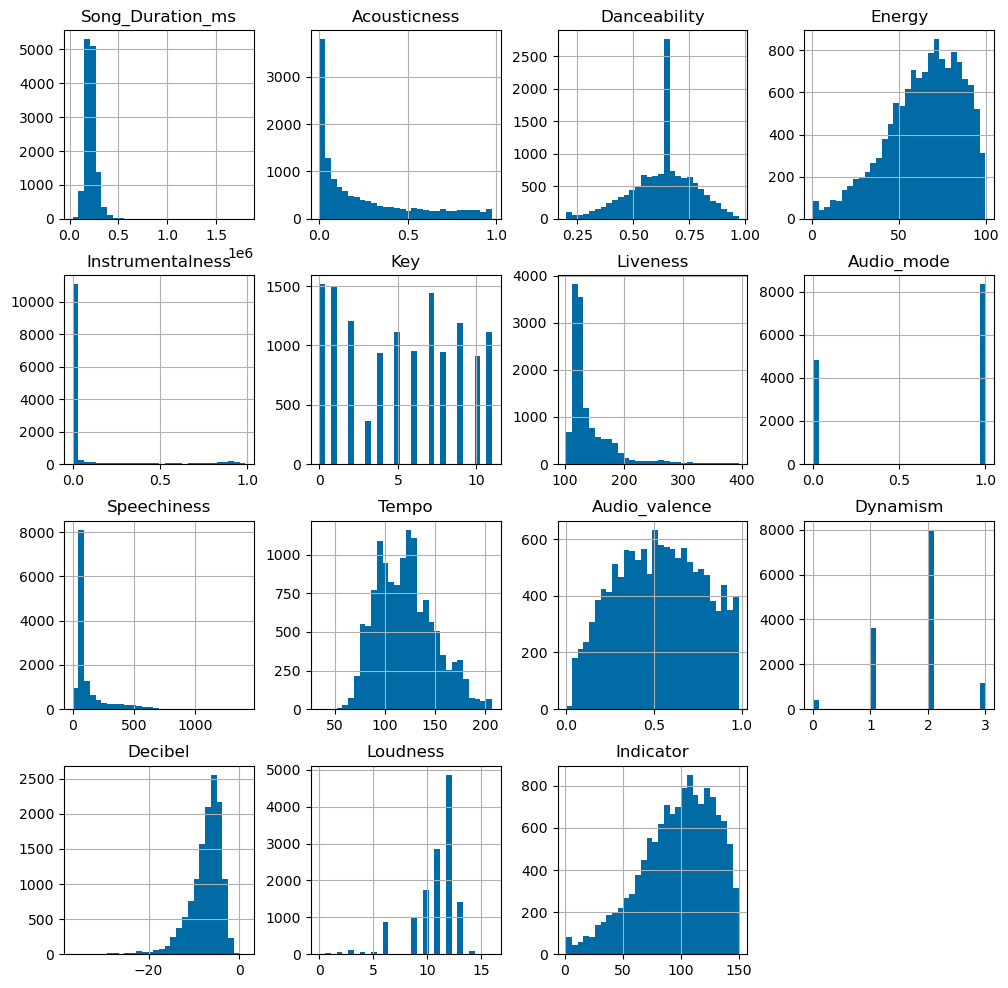

In [95]:
X_train.hist(bins=30, figsize=(12,12))

#### Reciprocal Transformation

In [96]:
# List of variables to check
variables = ['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy',
             'Instrumentalness', 'Key', 'Audio_mode', 'Speechiness', 'Tempo',
             'Audio_valence', 'Decibel', 'Indicator']

# Check for zero values in the specified columns
for variable in variables:
    zero_values = data_song_pop[data_song_pop[variable] == 0]
    if not zero_values.empty:
        print(f"Column '{variable}' contains zero values at indices:")


Column 'Danceability' contains zero values at indices:
Column 'Instrumentalness' contains zero values at indices:
Column 'Key' contains zero values at indices:
Column 'Audio_mode' contains zero values at indices:
Column 'Speechiness' contains zero values at indices:
Column 'Tempo' contains zero values at indices:
Column 'Audio_valence' contains zero values at indices:


In [97]:
# initialize the transformer
#rt = ReciprocalTransformer(variables = ['Song_Duration_ms', 'Acousticness', 'Energy','Decibel', 'Indicator'])

# fit transformer to the entire dataframe
#rt.fit(data_song_pop)

In [98]:
# transform the indicated variables within our data set
#data_tf_rt = rt.transform(data_song_pop)

In [99]:
#data_tf_rt.hist(bins=30, figsize=(12,12))

#### Square Transformation<a id="part4.4"></a>

In [100]:
# set up PowerTransformer with the square root exponent
#et = PowerTransformer(variables = ['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy', 'Audio_mode', 'Speechiness', 'Tempo', 'Audio_valence',  'Indicator'], exp=1/3) # for cube root

# fit transformer to data 
#et.fit(X_train)

In [101]:
# transform indicated variables within our dataframe
#X_train = et.transform(X_train)

In [102]:
#X_train.hist(bins=30, figsize=(12,12))

#### Power Transformation<a id="part4.3"></a>

In [103]:
#from sklearn.pipeline import Pipeline
#pipe = Pipeline([
    #('power1', PowerTransformer(variables = ['Decibel'], exp=0.6)),    
    #('power2', PowerTransformer(variables = ['Acousticness'], exp=0.4))
     #])

In [104]:
#pipe.fit(X_train)

In [105]:
#X_train = pipe.transform(X_train)

In [106]:
#X_train.hist(bins=30, figsize=(12,12))

#### Box-Cox Transformation<a id="part4.1"></a>

In [107]:
# Apply the BoxCox transformer
#bct = BoxCoxTransformer(variables=['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy', 'Tempo', 'Indicator'])
#bct.fit(X_train)
#X_train = bct.transform(X_train)


In [108]:
# the transformer stores the optimal parameter for each 
# variable in a dictionary in its attribute lambda_dict_

#bct.lambda_dict_

In [109]:

#diagnostic_plots(X_train, 'Song_Duration_ms')

In [110]:

#diagnostic_plots(X_train, 'Acousticness')

In [111]:
#diagnostic_plots(X_train, 'Danceability')

In [112]:
#diagnostic_plots(X_train, 'Energy')

In [113]:
#diagnostic_plots(X_train, 'Instrumentalness')

In [114]:
#diagnostic_plots(X_train, 'Tempo')

In [115]:
#diagnostic_plots(X_train, 'Indicator')

X_train.hist(bins=30, figsize=(12,12))

#### Yeo Johnson Transformation<a id="part4.2"></a>

In [116]:
# initialize the transformer with a subset of variables to transform
#yjt = YeoJohnsonTransformer(variables = ['Song_Duration_ms', 'Acousticness', 'Danceability', 
#       'Instrumentalness', 'Key', 'Liveness', 'Audio_mode', 'Speechiness',
#       'Dynamism', 'Loudness',
#       'Indicator'])

 #fit transformer to the dataframe
#yjt.fit(X_train)

In [117]:
#X_train = yjt.transform(X_train)

In [118]:
#X_train.info()

In [119]:
# make diagnostic plot of transformed variable (not in book)
#diagnostic_plots(X_train, 'Song_Duration_ms')

In [120]:

#diagnostic_plots(X_train, 'Acousticness')

In [121]:
#diagnostic_plots(X_train, 'Energy')

In [122]:
#diagnostic_plots(X_train, 'Instrumentalness')

In [123]:
#diagnostic_plots(X_train, 'Audio_mode') #no difference in transform

In [124]:
#diagnostic_plots(X_train, 'Speechiness')

In [125]:
#diagnostic_plots(X_train, 'Liveness')

In [126]:
#diagnostic_plots(X_train, 'Tempo')

In [127]:
#diagnostic_plots(X_train, 'Decibel')

In [128]:
#diagnostic_plots(X_train, 'Indicator')

In [129]:
# Number of features
#n_features = X_train.shape[1]

# Create a subplot grid
#fig, axes = plt.subplots(n_features, 1, figsize=(8, 30))

# Plot Q-Q plots for each feature
#for i, feature in enumerate(X_train.columns):
   # ax = axes[i]
   # stats.probplot(X_train[feature], dist="norm", plot=ax)
   # ax.set_title(f'Q-Q Plot for {feature}')
   # ax.get_lines()[1].set_color('r')  # Line of best fit color

# Adjust layout
#plt.tight_layout()
#plt.show()

In [130]:
#X_train.hist(bins=30, figsize=(12,12))

### Step 7: Variable Discretization /Binning<a id="part8"></a>

#### Equal Frequency Discrtization

In [131]:
# with feature engine we can automate the process for many variables
# in one line of code

#disc = EqualFrequencyDiscretiser(
   # q=5, variables=['Acousticness', 'Danceability', 'Energy'], return_object=True)

#disc.fit(X_train)

In [132]:
# transform train and test

#train_t = disc.transform(X_train)
#test_t = disc.transform(X_test)

In [133]:
#train_t[['Acousticness', 'Danceability', 'Energy']]

In [134]:
# let's explore if the bins have a linear relationship
# with the target: we see they don't

#pd.concat([train_t, y_train], axis=1).groupby('Acousticness')['Song_Popularity'].mean().plot() # MEDV -> target column
#plt.ylabel('mean of price')

In [135]:
#enc = OrdinalEncoder(encoding_method = 'ordered')

#enc.fit(train_t, y_train)

In [136]:
# we can fnd the list of encoded variables here
#enc.variables

In [137]:
# we can find a list of the re-ordered bins mappings here
#enc.encoder_dict_

In [138]:
# let's transformt the data sets
#X_train = enc.transform(train_t)
#X_test = enc.transform(test_t)

In [139]:
#pd.concat([X_train, y_train], axis=1).groupby('Acousticness')['Song_Popularity'].mean().plot()
#lt.ylabel('mean of price')

#### Equal Width Discretization

In [140]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualWidthDiscretiser(bins=10, variables = ['Song_Duration_ms', 'Energy'])

disc.fit(X_train)

EqualWidthDiscretiser(variables=['Song_Duration_ms', 'Energy'])

In [141]:
disc.binner_dict_

{'Song_Duration_ms': [-inf,
  208170.3,
  384967.6,
  561764.8999999999,
  738562.2,
  915359.5,
  1092156.7999999998,
  1268954.0999999999,
  1445751.4,
  1622548.7,
  inf],
 'Energy': [-inf,
  10.676278607610517,
  20.590025428987126,
  30.503772250363735,
  40.417519071740344,
  50.33126589311695,
  60.24501271449356,
  70.15875953587017,
  80.07250635724678,
  89.98625317862339,
  inf]}

In [142]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [143]:
X_train.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

In [144]:
# first we need to make a list with the numerical vars
#features_num_median = ['Danceability', 'Speechiness', 'Liveness']

features_num_median = ['Loudness', 'Dynamism', 'Decibel']

In [145]:
# Instantiate each imputer within a pipeline
pipe = Pipeline(steps=[
    ('imp_num_median', MeanMedianImputer(imputation_method='median', variables=features_num_median))
])

In [146]:
# now we fit the preprocessor
pipe.fit(X_train)

Pipeline(steps=[('imp_num_median',
                 MeanMedianImputer(variables=['Loudness', 'Dynamism',
                                              'Decibel']))])

In [147]:
# and now we impute the data
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [148]:
# Note that feature_engine maintain the order of original columns and return a dataframe
X_test.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

#### Variable Discretization/Binning

In [149]:
# Task 1: Select two variables to perform variable discretization/binning

#disc = EqualFrequencyDiscretiser(q=10, variables = ['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy',
       #'Instrumentalness', 'Key', 'Liveness', 'Audio_mode', 'Speechiness',
      # 'Tempo', 'Audio_valence', 'Dynamism', 'Decibel', 'Loudness',
      # 'Indicator'], return_object=True)

#disc.fit(X_train)

In [150]:
#disc.binner_dict_

In [151]:
# transform train and test sets

#train_t = disc.transform(X_train)
#test_t = disc.transform(X_test)

In [152]:
#pd.concat([train_t, y_train], axis=1).groupby('Song_Duration_ms')['Song_Popularity'].mean().plot() 
#plt.ylabel('mean reviews per month')

In [153]:
#pd.concat([train_t, y_train], axis=1).groupby('Loudness')['Song_Popularity'].mean().plot()
#plt.ylabel('mean of price')

### Step 8: Feature Engineer<a id="part9"></a>

In [154]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13184 entries, 4659 to 2732
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song_Duration_ms  13184 non-null  int64  
 1   Acousticness      13184 non-null  float64
 2   Danceability      13184 non-null  float64
 3   Energy            13184 non-null  int64  
 4   Instrumentalness  13184 non-null  float64
 5   Key               13184 non-null  int64  
 6   Liveness          13184 non-null  float64
 7   Audio_mode        13184 non-null  int64  
 8   Speechiness       13184 non-null  float64
 9   Tempo             13184 non-null  float64
 10  Audio_valence     13184 non-null  float64
 11  Dynamism          13184 non-null  int64  
 12  Decibel           13184 non-null  float64
 13  Loudness          13184 non-null  int64  
 14  Indicator         13184 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 1.6 MB


#### Standardlisation

In [155]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
#scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
#scaler.fit(X_train)

# transform train and test sets
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [156]:
# the scaler stores the mean of the features, learned from train set

#scaler.mean_

In [157]:
# let's transform the returned NumPy arrays to dataframes

#X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#### Mean Normalisation

In [158]:
# let's first learn the mean from the train set - unsupportedn fro negative strignsa nd floats

#means = X_train.mean(axis=0)
#means

In [159]:
# let's now learn the min and max values, and the value range 
# from the train set

#ranges = X_train.max(axis=0)-X_train.min(axis=0)
#ranges

In [160]:
# now we are ready to perform mean normalization:
#X_train_scaled = (X_train - means) / ranges
#X_test_scaled = (X_test - means) / ranges

#### Robust Scaling

In [161]:
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)


# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

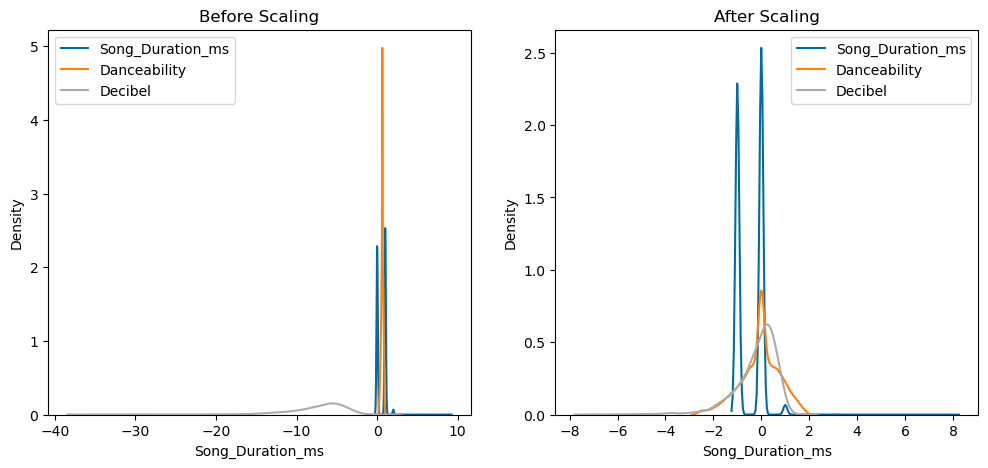

In [165]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Song_Duration_ms'], ax=ax1, label ='Song_Duration_ms')
sns.kdeplot(X_train['Danceability'], ax=ax1, label ='Danceability')
sns.kdeplot(X_train['Decibel'], ax=ax1, label ='Decibel')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Song_Duration_ms'], ax=ax2, label ='Song_Duration_ms')
sns.kdeplot(X_train_scaled['Danceability'], ax=ax2, label ='Danceability')
sns.kdeplot(X_train_scaled['Decibel'], ax=ax2, label ='Decibel')
ax2.legend()
plt.show()

In [166]:
X_train = X_train_scaled
X_test = X_test_scaled

#### MinMax Scaling

In [167]:
# set up the scaler
#scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
#scaler.fit(X_train)

# transform train and test sets
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [168]:
#X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#X_test = pd.DataFrame(X_testX_train_scaled, columns=X_test.columns)

#### PCA

In [169]:
# standardisation: with the StandardScaler from sklearn
from sklearn.decomposition import PCA


# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
# set up the PCA

pca = PCA()

In [171]:
# show shape of X_train_scaled (X_train after StandardScaler)
print(X_train_scaled.shape)

(13184, 15)


In [172]:
# train the PCA
# insert code here
pca.fit(X_train_scaled)

PCA()

In [173]:
# create the principal components

train_t = pca.transform(X_train_scaled)
test_t = pca.transform(X_test_scaled)

In [174]:
# show the variance explanation for each Principal Component
print(len(pca.explained_variance_ratio_)) # largest to smallest
print(pca.explained_variance_ratio_)

15
[0.31598543 0.09691982 0.07899057 0.07119055 0.06673314 0.06588474
 0.06247823 0.06021473 0.05216548 0.04587247 0.03575409 0.02646248
 0.0138203  0.00695544 0.00057252]


Text(0, 0.5, 'Percentage of Variance Explained')

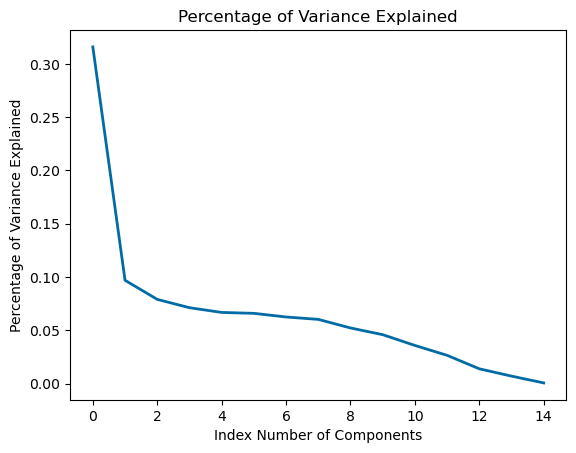

In [175]:
# determine the number of informative components

# the number of components is determined by the change
# in the decay in the percentage of variance explained
# by each component

plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Index Number of Components')
plt.ylabel('Percentage of Variance Explained')

In [176]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song_Duration_ms  13184 non-null  float64
 1   Acousticness      13184 non-null  float64
 2   Danceability      13184 non-null  float64
 3   Energy            13184 non-null  float64
 4   Instrumentalness  13184 non-null  float64
 5   Key               13184 non-null  float64
 6   Liveness          13184 non-null  float64
 7   Audio_mode        13184 non-null  float64
 8   Speechiness       13184 non-null  float64
 9   Tempo             13184 non-null  float64
 10  Audio_valence     13184 non-null  float64
 11  Dynamism          13184 non-null  float64
 12  Decibel           13184 non-null  float64
 13  Loudness          13184 non-null  float64
 14  Indicator         13184 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5

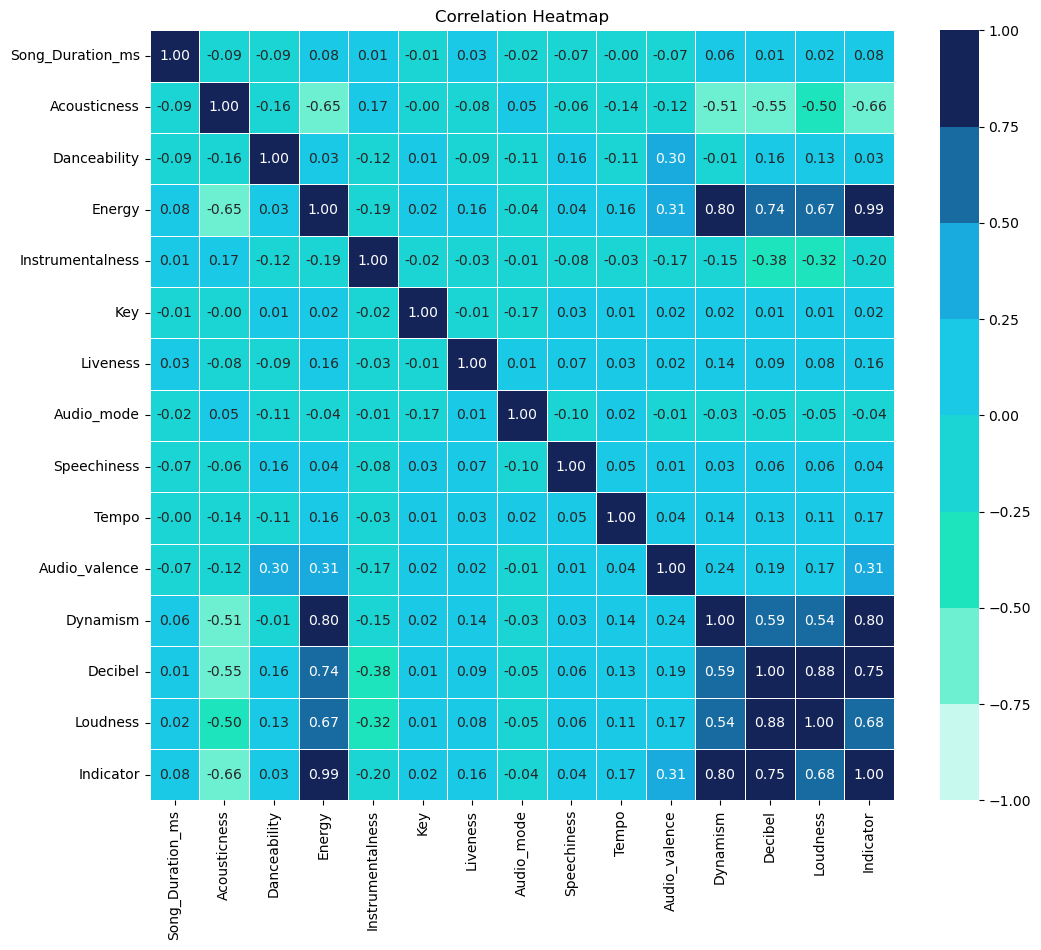

In [177]:
# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap=cmap_custom, annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

plt.title("Correlation Heatmap")
plt.show()


### Step 9: Linear Regression Modelling<a id="part10"></a>

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [178]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [179]:
X_train_final = train_t
X_test_final = test_t

y_train_final = y_train
y_test_final = y_test

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [181]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 133.28883403088034 
 test_mse: 132.9612948413804
train_r-sq: 0.3137099269025422 
 test_r-sq: 0.3197102511218515


In [182]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [183]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model performance
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")


Test MSE: 132.96129484138038
Test R-squared: 0.3197102511218516


In [184]:
# Make predictions using the trained model
predictions = model.predict(X_test)

# Display predictions
print("Predictions for new data:", predictions)

Predictions for new data: [45.54383612 47.07873041 43.54396907 ... 45.56048141 41.50283765
 46.93460434]


### Report<a id="part11"></a>

#### Introduction

This assignment is dedicated to constructing a predictive model using data sourced from a song company to anticipate song popularity. Its primary objective is to provide invaluable support to music labels in optimizing resource allocation and aligning song production with prevailing trends and audience preferences. The journey commences with meticulous data wrangling, encompassing tasks such as handling missing values and encoding categorical data. A pivotal component of this endeavor involves the implementation of a linear regression model. Through iterative refinement and adjustment, this model evolves to ensure optimal performance in predicting song popularity. Ultimately, this initiative heralds a new era of data-driven decision-making within the music industry, empowering labels to craft songs that resonate deeply with audiences.y.

#### Exploratory Data Analysis

In my analysis, I observed several notable correlations among the variables. There is a strong positive correlation between the following pairs: Indicator and Energy, Decibel and Energy, Decibel and Indicator, as well as Decibel and Song Popularity. These relationships indicate that as one variable increases, the other tends to increase as well, suggesting a mutual influence or shared pattern. Conversely, I identified strong negative correlations between Acousticness and Indicator, Decibel and Acousticness, and Energy and Acousticness. In these cases, as one variable increases, the other tends to decrease, indicating an inverse relationship or contrasting trends. These findings provide valuable insights into the interplay between different musical attributes and their impact on song characteristics and popularity.

#### Data Cleaning

Upon inspection, I observed the presence of '?' and NaN values, along with a column exhibiting a disorganized data format. Understanding the significance of missing data, I proceeded to assess the extent of null values across the dataset. To facilitate seamless data processing, I replaced '?' with np.nan, as the machine interprets NaN as a string, potentially leading to misinterpretation. Subsequently, I embarked on missing data imputation, a critical step in enhancing the dataset's integrity. Employing a structured approach, I leveraged a pipeline to streamline the imputation process. For numerical features, I opted for median imputation, a robust technique for handling missing numeric data. Conversely, categorical variables underwent category imputation, ensuring coherence and consistency within the dataset. By employing a systematic methodology encompassing data cleansing and imputation techniques, I laid the foundation for subsequent analysis and model development. This meticulous approach not only enhances the reliability of predictions but also fosters a comprehensive understanding of the dataset's nuances, thus empowering informed decision-making within the realm of predictive modeling and data analytics.

#### Data Transformation

In my quest to optimize the transformation of data, I explored five distinct techniques, each accompanied by its unique set of conditions. Logarithmic transformation emerged as a viable option solely for handling positive values, while Reciprocal Transformation demonstrated flexibility by accommodating negative values but excluding zeros. For transformations incompatible with negative values, I meticulously identified and removed categories containing such values. However, to circumvent the intricacies associated with individual conditions, I turned to Yeojohnson transformation, renowned for its versatility in accommodating various types of numerical data.

Despite initially favoring Yeojohnson, I encountered a significant setback when the mean squared error (MSE) on the test data soared to alarming levels, indicative of overfitting. This firsthand experience with overfitting prompted a reassessment of my approach, emphasizing the need to strike a balance between model complexity and generalization. Exploring diverse combinations of variables and transformation methods, I ultimately arrived at the decision to employ Log transformation for variables devoid of zero or negative values.

This iterative process not only underscored the importance of understanding data characteristics but also highlighted the necessity of mitigating overfitting risks through prudent model selection and refinement. By embracing a data-driven approach and leveraging lessons learned from firsthand experiences, I navigated through the complexities of transformation techniques, ultimately steering towards a more robust and effective modeling strategy.

#### Feature Engineer



I observed limited efficacy in applying scaling techniques to our dataset. Despite implementing scaling procedures, such as standardization, I encountered a notable disparity between the MSE scores of the training and testing data. This discrepancy strongly suggests the presence of overfitting issues, where the model performs exceedingly well on the training set but fails to generalize to unseen data during testing. While scaling is often employed to normalize feature values, especially when dealing with disparate scales and units, its application alone did not mitigate the overfitting observed in our model.

Overfitting can arise from various factors beyond scaling, including model complexity, dataset size, and regularization. In this scenario, despite employing standardization, the model exhibited signs of extreme overfitting, indicating the necessity of addressing other underlying issues. A holistic approach that encompasses data augmentation, model simplification, and regularization techniques is imperative to bolster the model's resilience against overfitting and improve its generalizability.

Additionally, I explored robust scaling, a technique recommended for datasets with numerous outliers. Given the presence of outliers in our dataset, robust scaling seemed like a viable approach. Retaining these outliers can be crucial for understanding the dynamics of viral songs, as outliers may represent unique instances of viral phenomena. Removing such outliers could potentially distort our understanding of the factors contributing to song virality. Therefore, I chose to preserve the outliers to maintain the fidelity of our data analysis.

In conclusion, while scaling techniques like standardization and robust scaling offer valuable normalization benefits, they alone may not suffice to mitigate overfitting issues. A comprehensive strategy that addresses various aspects of model development is essential to ensure robust performance and accurate predictions, especially in the context of identifying viral songs.

#### Linear Regression Model

During the initial stages of model development, I encountered significant overfitting, which was evident from the mean squared error (MSE) scores for the testing data reaching into the millions. This discrepancy between training and testing performance suggested that the model was capturing noise rather than underlying patterns, leading to poor generalization.

Upon revisiting my feature engineering strategy, I identified issues with my data transformation techniques. Implementing the Box-Cox transformation, which stabilizes variance and normalizes distributions, resulted in a dramatic improvement. The MSE test score dropped to approximately 2, indicating a substantial enhancement in model accuracy.

However, the model's R-squared value was negative post-transformation, implying that it still failed to capture the variance of the target variable effectively. This could be due to my model's inability to accommodate the complexity of the data or the need for further feature selection and engineering.


#### Summary and Further Improvements

In further analysing our findings, it's evident that additional training is essential to enhance the predictive power of the model. While initial insights have been promising, there's room for improvement to ensure more accurate predictions. As part of this refinement process, we opted to remove two variables from our analysis. This strategic decision was made to streamline the model and improve its predictive performance.

Notably, we observed a significant positive correlation between two key variables, namely Decibel and Energy, and song popularity. This finding suggests that songs with higher energy levels and louder volumes, as indicated by higher decibel levels, tend to enjoy greater popularity among listeners. This correlation underscores the importance of these attributes in shaping the appeal and commercial success of a song. 

To capitalize on this insight and further enhance the model's predictive capabilities, future training iterations will focus on optimizing the algorithm's ability to leverage these influential factors effectively. By fine-tuning the model to better capture the nuanced relationships between musical attributes and audience preferences, we aim to develop a more robust predictive tool that accurately forecasts song popularity. Additionally, ongoing data collection and analysis will be instrumental in continually refining and validating the model's performance, ensuring its relevance and efficacy within the music industry.

### Reference<a id="part12"></a>

OpenAI. (2024, June 1)